<a href="https://colab.research.google.com/github/Udzf/EV/blob/main/Copie_de_Copie_de_Fuel_type_in_Switzerland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install linearmodels

In [44]:
!pip install pyjstat

In [45]:
import requests
import json
from pyjstat import pyjstat
import pandas as pd
import io

# Data Presentation




## Percentage of EV in Switzerland

In [46]:
# API URL
url = "https://www.pxweb.bfs.admin.ch/api/v1/en/px-x-1103020100_101/px-x-1103020100_101.px"

# JSON query body
query = {
    "query": [
        {
            "code": "Kanton",
            "selection": {
                "filter": "item",
                "values": ["0"]
            }
        },
        {
            "code": "Treibstoff",
            "selection": {
                "filter": "item",
                "values": ["100", "200", "300", "9900", "9999"]
            }
        }
    ],
    "response": {
        "format": "json-stat"
    }
}

# Send POST request
headers = {
    "Content-Type": "application/json"
}

response = requests.post(url, headers=headers, data=json.dumps(query))

# Handle the response
if response.status_code == 200:
    result = response.json()

    # Parse JSON-stat to DataFrame
    dataset = pyjstat.Dataset.read(json.dumps(result))
    df = dataset.write('dataframe')

In [47]:
# Create a list of the desired values
desired_values = ["> Passenger cars", "> Passenger vehicles", "> Goods vehicles", "> Agricultural vehicles", "> Industrial vehicles", "> Motorcycles"]

# Filter the DataFrame
filtered_df = df[df['Vehicle group / type'].isin(desired_values)]

# Update the original DataFrame
df = filtered_df

In [48]:
filtered_df = df[(df['Fuel'] == 'Without motor') & (df['value'] > 0)]
vehicle_groups = filtered_df['Vehicle group / type'].unique().tolist()



In [49]:
# Get the unique values from vehicle_groups
vehicle_groups_unique = set(vehicle_groups)

# Filter the DataFrame to exclude rows in vehicle_groups_unique
filtered_df = df[~df['Vehicle group / type'].isin(vehicle_groups_unique)]

# Update the original DataFrame
df = filtered_df

In [50]:
# Filter the DataFrame to exclude rows where Fuel is "Without motor"
filtered_df = df[df['Fuel'] != 'Without motor']

# Update the original DataFrame
df = filtered_df

In [51]:
print(df)

           Canton Vehicle group / type    Fuel  Year    value
0     Switzerland     > Passenger cars  Petrol  1990  2905762
1     Switzerland     > Passenger cars  Petrol  1991  2975154
2     Switzerland     > Passenger cars  Petrol  1992  3006666
3     Switzerland     > Passenger cars  Petrol  1993  3022762
4     Switzerland     > Passenger cars  Petrol  1994  3073062
...           ...                  ...     ...   ...      ...
4510  Switzerland        > Motorcycles   Other  2020      133
4511  Switzerland        > Motorcycles   Other  2021      225
4512  Switzerland        > Motorcycles   Other  2022      223
4513  Switzerland        > Motorcycles   Other  2023     1089
4514  Switzerland        > Motorcycles   Other  2024     1061

[840 rows x 5 columns]


In [52]:
electricity_sums_by_year = df[df['Fuel'] == 'Electricity'].groupby('Year')['value'].sum() / df.groupby('Year')['value'].sum()

# Convert the result to a DataFrame
electricity_sums_by_year = electricity_sums_by_year.to_frame(name='% of EV')



In [53]:
# Assuming electricity_sums_by_year is your DataFrame
electricity_sums_by_year = electricity_sums_by_year.rename(columns={'Year': 'Year'})  # Renaming the existing index to 'Year'

electricity_sums_by_year = electricity_sums_by_year.reset_index()  # Resetting the index to make 'Year' a regular column

In [54]:
import pandas as pd

# Assuming 'electricity_sums_by_year' is your DataFrame

# Set display option for floats
pd.set_option('display.float_format', '{:.10f}'.format)

# Display the DataFrame
print(electricity_sums_by_year)

    Year      % of EV
0   1990 0.0009770101
1   1991 0.0011716958
2   1992 0.0012226234
3   1993 0.0012369351
4   1994 0.0012119701
5   1995 0.0011741396
6   1996 0.0011501140
7   1997 0.0011402832
8   1998 0.0011317006
9   1999 0.0011416488
10  2000 0.0011315854
11  2001 0.0011035659
12  2002 0.0011035751
13  2003 0.0010893367
14  2004 0.0009685677
15  2005 0.0009362887
16  2006 0.0009122830
17  2007 0.0008994777
18  2008 0.0009326720
19  2009 0.0010338883
20  2010 0.0012404955
21  2011 0.0016564781
22  2012 0.0022425093
23  2013 0.0026910719
24  2014 0.0031903064
25  2015 0.0038320374
26  2016 0.0043966135
27  2017 0.0050716490
28  2018 0.0059689643
29  2019 0.0077719097
30  2020 0.0103407374
31  2021 0.0152371942
32  2022 0.0221826564
33  2023 0.0297662325
34  2024 0.0376389726


In [55]:
# Display the result
print(electricity_sums_by_year)

    Year      % of EV
0   1990 0.0009770101
1   1991 0.0011716958
2   1992 0.0012226234
3   1993 0.0012369351
4   1994 0.0012119701
5   1995 0.0011741396
6   1996 0.0011501140
7   1997 0.0011402832
8   1998 0.0011317006
9   1999 0.0011416488
10  2000 0.0011315854
11  2001 0.0011035659
12  2002 0.0011035751
13  2003 0.0010893367
14  2004 0.0009685677
15  2005 0.0009362887
16  2006 0.0009122830
17  2007 0.0008994777
18  2008 0.0009326720
19  2009 0.0010338883
20  2010 0.0012404955
21  2011 0.0016564781
22  2012 0.0022425093
23  2013 0.0026910719
24  2014 0.0031903064
25  2015 0.0038320374
26  2016 0.0043966135
27  2017 0.0050716490
28  2018 0.0059689643
29  2019 0.0077719097
30  2020 0.0103407374
31  2021 0.0152371942
32  2022 0.0221826564
33  2023 0.0297662325
34  2024 0.0376389726


In [56]:
electricity_sums_by_year.columns.tolist()

['Year', '% of EV']

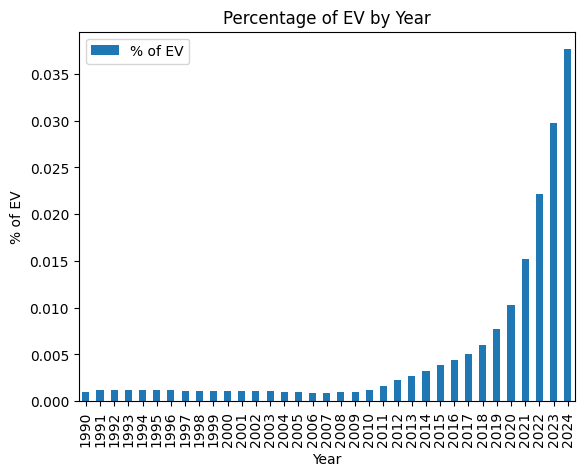

In [57]:
import matplotlib.pyplot as plt

# Assuming electricity_sums_by_year is your DataFrame
electricity_sums_by_year.plot(x='Year', y='% of EV', kind='bar')
plt.xlabel('Year')
plt.ylabel('% of EV')
plt.title('Percentage of EV by Year')
plt.show()

In [58]:
# Reset the index to make 'Fuel' and 'Year' regular columns
df_grouped = df.reset_index()

# Select the desired columns
df_grouped = df_grouped[['Fuel', 'Year', 'Canton', 'Vehicle group / type', 'value']]

# Optional: Sort the DataFrame by 'Fuel' and 'Year'
df_grouped = df_grouped.sort_values(by=['Fuel', 'Year'])



In [59]:
# Reset the index to make 'Fuel' and 'Year' regular columns
df_grouped = df.reset_index()

# Select the desired columns with 'Year' first
df_grouped = df_grouped[['Year', 'Fuel', 'Canton', 'Vehicle group / type', 'value']]

# Optional: Sort the DataFrame by 'Fuel' and 'Year'
df_grouped = df_grouped.sort_values(by=['Fuel', 'Year'])

# Display the result
print(df_grouped)

     Year    Fuel       Canton     Vehicle group / type   value
35   1990  Diesel  Switzerland         > Passenger cars   79129
175  1990  Diesel  Switzerland     > Passenger vehicles   12747
315  1990  Diesel  Switzerland         > Goods vehicles   99436
455  1990  Diesel  Switzerland  > Agricultural vehicles  149245
595  1990  Diesel  Switzerland    > Industrial vehicles   35734
..    ...     ...          ...                      ...     ...
174  2024  Petrol  Switzerland     > Passenger vehicles    8149
314  2024  Petrol  Switzerland         > Goods vehicles   57082
454  2024  Petrol  Switzerland  > Agricultural vehicles   13111
594  2024  Petrol  Switzerland    > Industrial vehicles    6797
734  2024  Petrol  Switzerland            > Motorcycles  783535

[840 rows x 5 columns]


In [60]:
df_grouped

,Year,Fuel,Canton,Vehicle group / type,value
35,1990,Diesel,Switzerland,> Passenger cars,79129
175,1990,Diesel,Switzerland,> Passenger vehicles,12747
315,1990,Diesel,Switzerland,> Goods vehicles,99436
455,1990,Diesel,Switzerland,> Agricultural vehicles,149245
595,1990,Diesel,Switzerland,> Industrial vehicles,35734
...,...,...,...,...,...
174,2024,Petrol,Switzerland,> Passenger vehicles,8149
314,2024,Petrol,Switzerland,> Goods vehicles,57082
454,2024,Petrol,Switzerland,> Agricultural vehicles,13111
594,2024,Petrol,Switzerland,> Industrial vehicles,6797


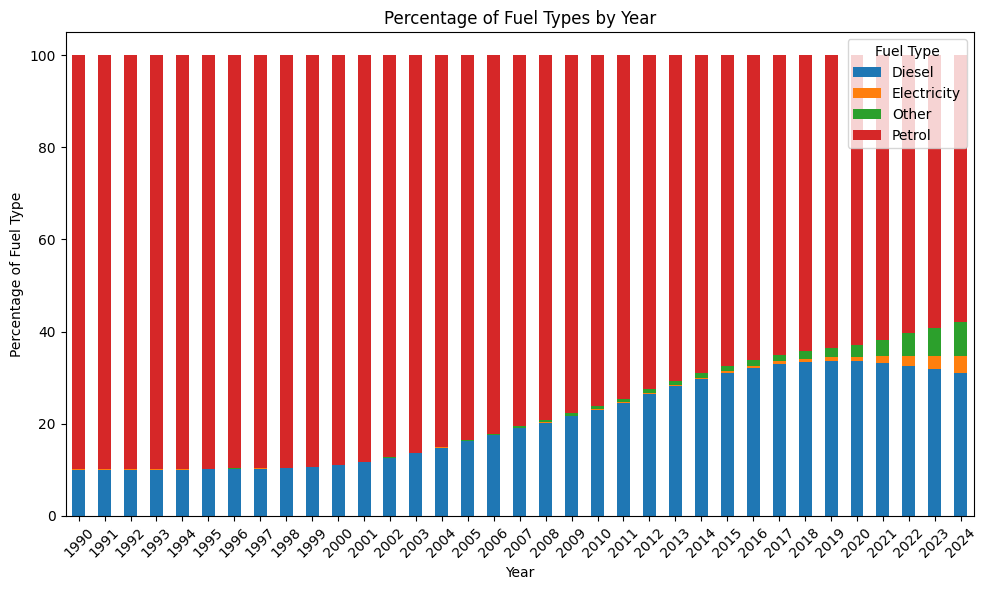

In [61]:
import matplotlib.pyplot as plt

# Group by 'Year' and 'Fuel' and calculate the sum of 'Value'
fuel_year_sums = df_grouped.groupby(['Year', 'Fuel'])['value'].sum().reset_index()

# Calculate the total sum of 'Value' for each year
year_totals = fuel_year_sums.groupby('Year')['value'].sum().reset_index()

# Merge the two DataFrames to calculate the percentage
fuel_year_sums = pd.merge(fuel_year_sums, year_totals, on='Year', suffixes=('', '_total'))
fuel_year_sums['Percentage'] = (fuel_year_sums['value'] / fuel_year_sums['value_total']) * 100

# Pivot the DataFrame to have 'Fuel' as columns and 'Percentage' as values
fuel_percentage_by_year = fuel_year_sums.pivot(index='Year', columns='Fuel', values='Percentage')

# Create the plot
fuel_percentage_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))  # Adjust figsize as needed
plt.xlabel('Year')
plt.ylabel('Percentage of Fuel Type')
plt.title('Percentage of Fuel Types by Year')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [62]:
percentage_electricity_2024 = fuel_percentage_by_year.loc[fuel_percentage_by_year.index == '2024', 'Electricity'].values[0]
print(f"Percentage of Electricity in 2024: {percentage_electricity_2024:.2f}%")

Percentage of Electricity in 2024: 3.76%


## Percentage of EV per Canton

In [63]:

# API URL
url = "https://www.pxweb.bfs.admin.ch/api/v1/en/px-x-1103020100_101/px-x-1103020100_101.px"

# JSON query body
query = {

  "query": [
    {
      "code": "Kanton",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26"
        ]
      }
    },
    {
      "code": "Fahrzeuggruppe / -art",
      "selection": {
        "filter": "item",
        "values": [
          "100",
          "200",
          "300",
          "400",
          "500",
          "600"
        ]
      }
    },
    {
      "code": "Treibstoff",
      "selection": {
        "filter": "item",
        "values": [
          "100",
          "200",
          "300",
          "9900"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat"
  }
}

response = requests.post(url, headers=headers, data=json.dumps(query))

# Handle the response
if response.status_code == 200:
    result = response.json()

    # Parse JSON-stat to DataFrame
    dataset = pyjstat.Dataset.read(json.dumps(result))
    Canton_data = dataset.write('dataframe')

    print(Canton_data.head())
else:
    print(f"Request failed: {response.status_code}\n{response.text}")

   Canton Vehicle group / type    Fuel  Year   value
0  Zürich     > Passenger cars  Petrol  1990  502276
1  Zürich     > Passenger cars  Petrol  1991  508601
2  Zürich     > Passenger cars  Petrol  1992  511444
3  Zürich     > Passenger cars  Petrol  1993  510469
4  Zürich     > Passenger cars  Petrol  1994  516556


In [64]:
# Group by 'Canton', 'Year', and 'Fuel' and calculate the sum of 'Value'
canton_year_fuel_sums = Canton_data.groupby(['Canton', 'Year', 'Fuel'])['value'].sum().reset_index()

# Calculate the total sum of 'Value' for each Canton and year
canton_year_totals = canton_year_fuel_sums.groupby(['Canton', 'Year'])['value'].sum().reset_index()

# Merge the two DataFrames to calculate the percentage
canton_year_fuel_sums = pd.merge(canton_year_fuel_sums, canton_year_totals, on=['Canton', 'Year'], suffixes=('', '_total'))
canton_year_fuel_sums['Percentage'] = (canton_year_fuel_sums['value'] / canton_year_fuel_sums['value_total']) * 100

# Filter for 'Electricity' fuel type
electricity_percentage_by_canton_year = canton_year_fuel_sums[canton_year_fuel_sums['Fuel'] == 'Electricity']

# Display the result
print(electricity_percentage_by_canton_year[['Canton', 'Year', 'Percentage']])

      Canton  Year   Percentage
1     Aargau  1990 0.0540705413
5     Aargau  1991 0.0710483162
9     Aargau  1992 0.0740001718
13    Aargau  1993 0.0716696420
17    Aargau  1994 0.0659009003
...      ...   ...          ...
3621  Zürich  2020 1.3324801174
3625  Zürich  2021 1.9276964094
3629  Zürich  2022 2.7467375720
3633  Zürich  2023 3.7268241963
3637  Zürich  2024 4.7792822343

[910 rows x 3 columns]


In [65]:
# Find the canton with the highest percentage
highest_canton = electricity_percentage_by_canton_year.loc[electricity_percentage_by_canton_year['Percentage'].idxmax(), 'Canton']


# Find the canton with the lowest percentage
lowest_canton = electricity_percentage_by_canton_year.loc[electricity_percentage_by_canton_year['Percentage'].idxmin(), 'Canton']

print(f"Canton with the highest percentage: {highest_canton}")
print(f"Canton with the lowest percentage: {lowest_canton}")

Canton with the highest percentage: Zug
Canton with the lowest percentage: Appenzell-Innerrhoden


In [66]:
# Sort by Percentage in descending order, get the top 2 unique cantons, and convert to a list
highest_cantons = electricity_percentage_by_canton_year.sort_values(by='Percentage', ascending=False)['Canton'].unique()[:2].tolist()

# Sort by Percentage in ascending order, get the top 2 unique cantons, and convert to a list
lowest_cantons = electricity_percentage_by_canton_year.sort_values(by='Percentage', ascending=True)['Canton'].unique()[:2].tolist()

print(f"Cantons with the highest percentage: {highest_cantons}")
print(f"Cantons with the lowest percentage: {lowest_cantons}")

Cantons with the highest percentage: ['Zug', 'Zürich']
Cantons with the lowest percentage: ['Appenzell-Innerrhoden', 'Jura']


In [67]:
print(electricity_percentage_by_canton_year)

      Canton  Year         Fuel  value  value_total   Percentage
1     Aargau  1990  Electricity    156       288512 0.0540705413
5     Aargau  1991  Electricity    211       296981 0.0710483162
9     Aargau  1992  Electricity    224       302702 0.0740001718
13    Aargau  1993  Electricity    220       306964 0.0716696420
17    Aargau  1994  Electricity    207       314108 0.0659009003
...      ...   ...          ...    ...          ...          ...
3621  Zürich  2020  Electricity  12931       970446 1.3324801174
3625  Zürich  2021  Electricity  18987       984958 1.9276964094
3629  Zürich  2022  Electricity  27127       987608 2.7467375720
3633  Zürich  2023  Electricity  37277      1000235 3.7268241963
3637  Zürich  2024  Electricity  48156      1007599 4.7792822343

[910 rows x 6 columns]


In [68]:
electricity_percentage_by_canton_year['Year'] = pd.to_numeric(electricity_percentage_by_canton_year['Year'])
electricity_percentage_by_canton_year_2010 = electricity_percentage_by_canton_year[
    (electricity_percentage_by_canton_year['Year'] >= 2007) & (electricity_percentage_by_canton_year['Year'] <= 2022)
]

<ipython-input-68-539794d53d45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_percentage_by_canton_year['Year'] = pd.to_numeric(electricity_percentage_by_canton_year['Year'])


In [69]:
print(electricity_percentage_by_canton_year_2010.head(20))

                     Canton  Year         Fuel  value  value_total  \
69                   Aargau  2007  Electricity    169       417742   
73                   Aargau  2008  Electricity    203       424718   
77                   Aargau  2009  Electricity    240       428203   
81                   Aargau  2010  Electricity    292       440480   
85                   Aargau  2011  Electricity    333       452282   
89                   Aargau  2012  Electricity    470       463958   
93                   Aargau  2013  Electricity    566       473792   
97                   Aargau  2014  Electricity    769       483150   
101                  Aargau  2015  Electricity   1066       490185   
105                  Aargau  2016  Electricity   1429       498194   
109                  Aargau  2017  Electricity   1850       505108   
113                  Aargau  2018  Electricity   2275       513127   
117                  Aargau  2019  Electricity   3226       519246   
121                 

In [70]:
# Select the desired columns
electricity_percentage_by_year_by_canton = electricity_percentage_by_canton_year_2010[['Year', 'Canton', 'Percentage']]

# Display the result
print(electricity_percentage_by_year_by_canton)

      Year  Canton   Percentage
69    2007  Aargau 0.0404555922
73    2008  Aargau 0.0477964202
77    2009  Aargau 0.0560481828
81    2010  Aargau 0.0662913186
85    2011  Aargau 0.0736266312
...    ...     ...          ...
3613  2018  Zürich 0.7618764011
3617  2019  Zürich 0.9805270333
3621  2020  Zürich 1.3324801174
3625  2021  Zürich 1.9276964094
3629  2022  Zürich 2.7467375720

[416 rows x 3 columns]


In [71]:
# Group by 'Canton' and calculate the mean of 'Percentage'
average_percentage_by_canton = electricity_percentage_by_canton_year_2010.groupby('Canton')['Percentage'].mean()

# Convert the result to a DataFrame
average_percentage_by_canton = average_percentage_by_canton.to_frame(name='Average Percentage')

# Reset the index to make 'Canton' a regular column
average_percentage_by_canton = average_percentage_by_canton.reset_index()

# Display the result
print(average_percentage_by_canton)

                    Canton  Average Percentage
0                   Aargau        0.4272353078
1   Appenzell-Ausserrhoden        0.4023321199
2    Appenzell-Innerrhoden        0.4094178602
3         Basel-Landschaft        0.4895706876
4              Basel-Stadt        0.5043691105
5                     Bern        1.0267592318
6                 Fribourg        0.3482835421
7                   Genève        0.3899214730
8                   Glarus        0.4200243030
9               Graubünden        0.3752150586
10                    Jura        0.2938455486
11                  Luzern        0.4177059033
12               Neuchâtel        0.3056246840
13               Nidwalden        0.4511511644
14                Obwalden        0.3881381580
15            Sankt Gallen        0.4611349147
16            Schaffhausen        0.4778268225
17                  Schwyz        0.4833802410
18               Solothurn        0.4007338831
19                 Thurgau        0.4835316197
20           

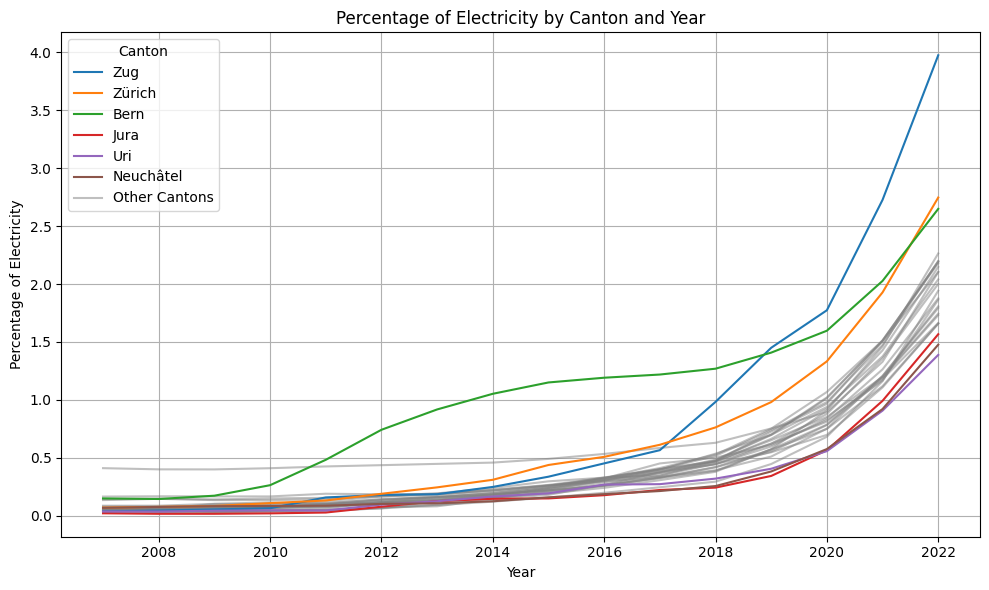

In [72]:
# Define the cantons to highlight in color
highlight_cantons = ["Zug", "Zürich", "Bern", "Jura", "Uri","Neuchâtel"]  # Updated highlight_cantons

# Pivot to create canton_percentage_by_year_2010
canton_percentage_by_year_2010 = electricity_percentage_by_canton_year_2010.pivot(
    index='Year', columns='Canton', values='Percentage'
)


# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed

# Plot all cantons in grey without adding them to the legend
for column in canton_percentage_by_year_2010.columns:
    if column not in highlight_cantons:
        canton_percentage_by_year_2010[column].plot(kind='line', ax=ax, color='grey', alpha=0.5)

# Plot highlighted cantons in color
for canton in highlight_cantons:
    if canton in canton_percentage_by_year_2010.columns:  # Check if canton is present in data
        canton_percentage_by_year_2010[canton].plot(kind='line', ax=ax, label=canton)

# Add a dummy line for "Other Cantons" to the legend
other_canton_line = ax.plot([], [], color='grey', alpha=0.5, label='Other Cantons')[0]  # Get the line object

# Get handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Filter handles and labels to keep only desired entries
desired_labels = highlight_cantons + ['Other Cantons']
desired_handles = [h for h, l in zip(handles, labels) if l in desired_labels]
desired_labels = [l for l in labels if l in desired_labels]  # Keep original order

# Create the legend with filtered handles and labels
plt.legend(desired_handles, desired_labels, title='Canton')

plt.xlabel('Year')
plt.ylabel('Percentage of Electricity')
plt.title('Percentage of Electricity by Canton and Year')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [73]:
# Filter for the year 2024
data_2024 = electricity_percentage_by_canton_year_2010[electricity_percentage_by_canton_year_2010['Year'] == 2024]

# Sort by Percentage in ascending order and get the top 2 unique cantons
lowest_cantons_2024 = data_2024.sort_values(by='Percentage', ascending=True)['Canton'].unique()[:2].tolist()

print(f"Cantons with the lowest percentage in 2024: {lowest_cantons_2024}")

Cantons with the lowest percentage in 2024: []


In [74]:
# Define the list of cantons to keep
selected_cantons = ["Zürich", "Zug", "Bern", "Jura", "Uri", "Neuchâtel"]

# Filter the DataFrame
filtered_data = electricity_percentage_by_year_by_canton[electricity_percentage_by_year_by_canton['Canton'].isin(selected_cantons)]

# Display the result
print(filtered_data)

      Year  Canton   Percentage
769   2007    Bern 0.1486914704
773   2008    Bern 0.1436545482
777   2009    Bern 0.1722485422
781   2010    Bern 0.2629322237
785   2011    Bern 0.4820816294
...    ...     ...          ...
3613  2018  Zürich 0.7618764011
3617  2019  Zürich 0.9805270333
3621  2020  Zürich 1.3324801174
3625  2021  Zürich 1.9276964094
3629  2022  Zürich 2.7467375720

[96 rows x 3 columns]


## Air quality in Switzerland

In [75]:
url = "https://raw.githubusercontent.com/Udzf/EV/main/emissions_data.csv"  # Direct link to raw content
response = requests.get(url)
data = response.content.decode('utf-8')  # Decode content to string
emissions_data = pd.read_csv(io.StringIO(data))

In [76]:
emissions_data.head()

,year,C02 due to transport (in tonne),Emission of N02 due to transport in 1000 tonne,PM 10 due to transport in tonne,NMVOCs due to transport in 1000 tonne
0,1990,14.6000000000,NaN,NaN,NaN
1,1991,15.1000000000,NaN,NaN,NaN
2,1992,15.4000000000,NaN,NaN,NaN
3,1993,14.3000000000,NaN,NaN,NaN
4,1994,14.5000000000,NaN,NaN,NaN


In [77]:
filtered_emissions_data = emissions_data[emissions_data['year'] >= 2000]

In [78]:
filtered_emissions_data2 = filtered_emissions_data[filtered_emissions_data['year'] != 2023]

In [79]:
print(filtered_emissions_data2)

    year  C02 due to transport (in tonne)  \
10  2000                    15.8000000000   
11  2001                    15.5000000000   
12  2002                    15.5000000000   
13  2003                    15.6000000000   
14  2004                    15.8000000000   
15  2005                    15.9000000000   
16  2006                    16.0000000000   
17  2007                    16.3000000000   
18  2008                    16.6000000000   
19  2009                    16.4000000000   
20  2010                    16.3000000000   
21  2011                    16.1000000000   
22  2012                    16.3000000000   
23  2013                    16.2000000000   
24  2014                    16.1000000000   
25  2015                    15.3000000000   
26  2016                    15.2000000000   
27  2017                    14.9000000000   
28  2018                    14.9000000000   
29  2019                    14.8000000000   
30  2020                    13.5000000000   
31  2021  

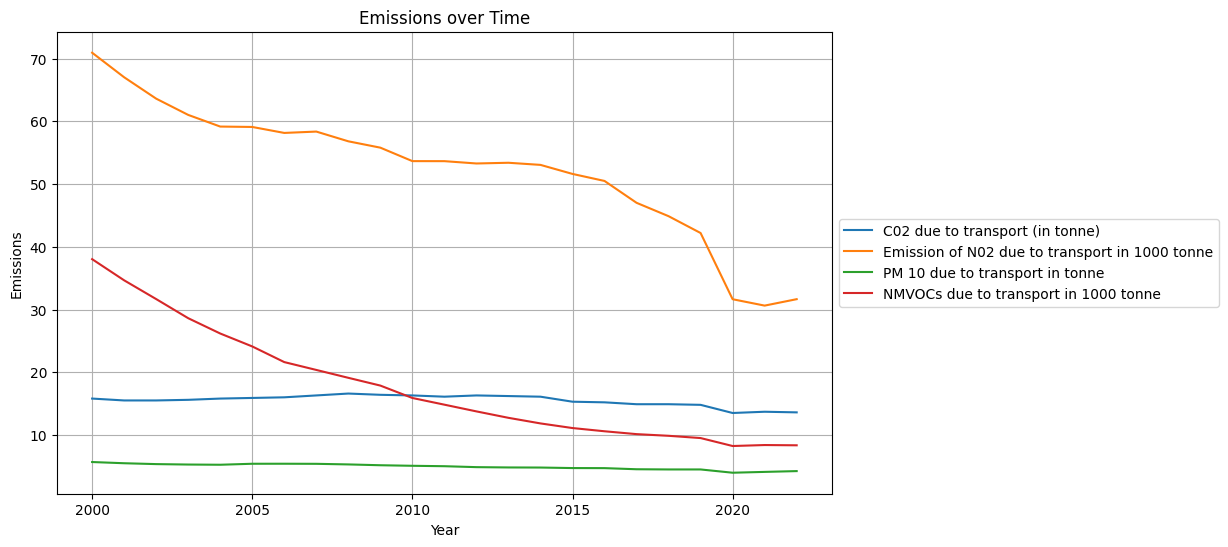

In [80]:
import matplotlib.pyplot as plt

# Assuming 'filtered_emissions_data2' is your DataFrame

# Set 'year' as the index for easier plotting
filtered_emissions_data2 = filtered_emissions_data2.set_index('year')

# Plot all columns except 'year'
filtered_emissions_data2.plot(figsize=(10, 6))  # Adjust figsize as needed

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Emissions')  # You might need to adjust the label based on your data
plt.title('Emissions over Time')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.show()

In [81]:
filtered_emissions_data2 = filtered_emissions_data2.rename(columns={'year': 'Year'})

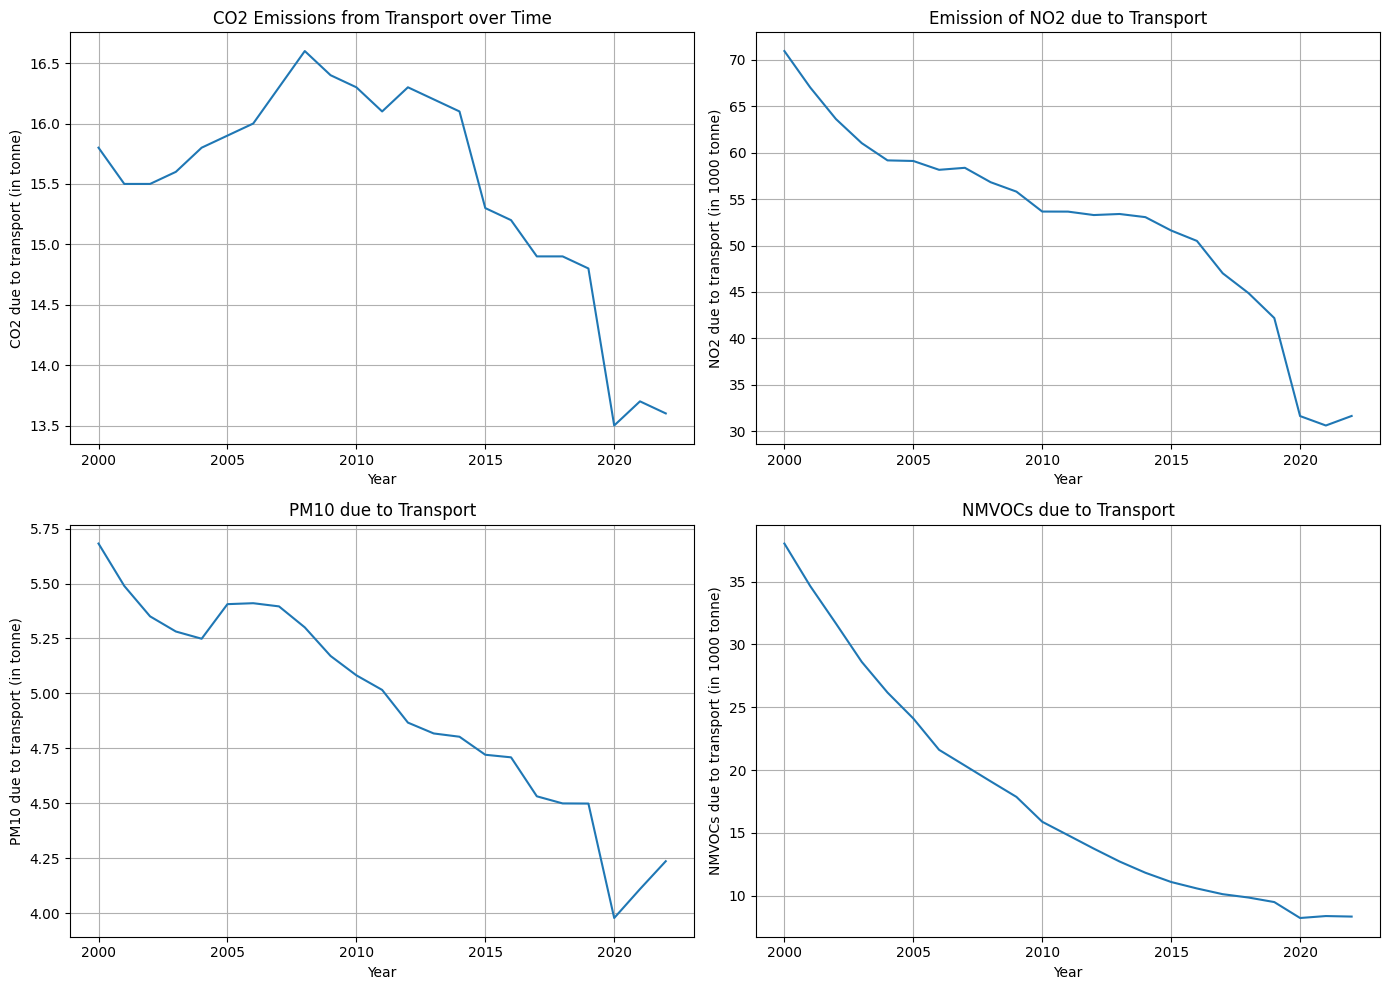

In [82]:
import matplotlib.pyplot as plt

# Assuming 'filtered_emissions_data2' is your DataFrame

# Set 'year' as the index (only once)
if 'year' in filtered_emissions_data2.columns:
    filtered_emissions_data2 = filtered_emissions_data2.set_index('year')

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# First plot - CO2 emissions
axes[0, 0].plot(filtered_emissions_data2.index, filtered_emissions_data2['C02 due to transport (in tonne)'])
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('CO2 due to transport (in tonne)')
axes[0, 0].set_title('CO2 Emissions from Transport over Time')
axes[0, 0].grid(True)

# Second plot - NO2 emissions
axes[0, 1].plot(filtered_emissions_data2.index, filtered_emissions_data2['Emission of N02 due to transport in 1000 tonne'])
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('NO2 due to transport (in 1000 tonne)')
axes[0, 1].set_title('Emission of NO2 due to Transport')
axes[0, 1].grid(True)

# Third plot - PM10 emissions
axes[1, 0].plot(filtered_emissions_data2.index, filtered_emissions_data2['PM 10 due to transport in tonne'])
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('PM10 due to transport (in tonne)')
axes[1, 0].set_title('PM10 due to Transport')
axes[1, 0].grid(True)

# Fourth plot - NMVOCs emissions
axes[1, 1].plot(filtered_emissions_data2.index, filtered_emissions_data2['NMVOCs due to transport in 1000 tonne'])
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('NMVOCs due to transport (in 1000 tonne)')
axes[1, 1].set_title('NMVOCs due to Transport')
axes[1, 1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [83]:
filtered_emissions_data2

,C02 due to transport (in tonne),Emission of N02 due to transport in 1000 tonne,PM 10 due to transport in tonne,NMVOCs due to transport in 1000 tonne
year,,,,
2000,15.8000000000,70.9411020321,5.6821923187,38.0275441705
2001,15.5000000000,67.0271024847,5.4890827279,34.6515234898
2002,15.5000000000,63.6176755983,5.3507106170,31.6629269978
2003,15.6000000000,61.0266213210,5.2817224726,28.6142555110
2004,15.8000000000,59.1683241102,5.2488303450,26.1726391823
2005,15.9000000000,59.1047299231,5.4063227853,24.1107485742
2006,16.0000000000,58.1530279024,5.4105879742,21.6154270489
2007,16.3000000000,58.3688546501,5.3961179009,20.3642725050
2008,16.6000000000,56.8171466876,5.3005748916,19.1082838257


KeyError: 'year'

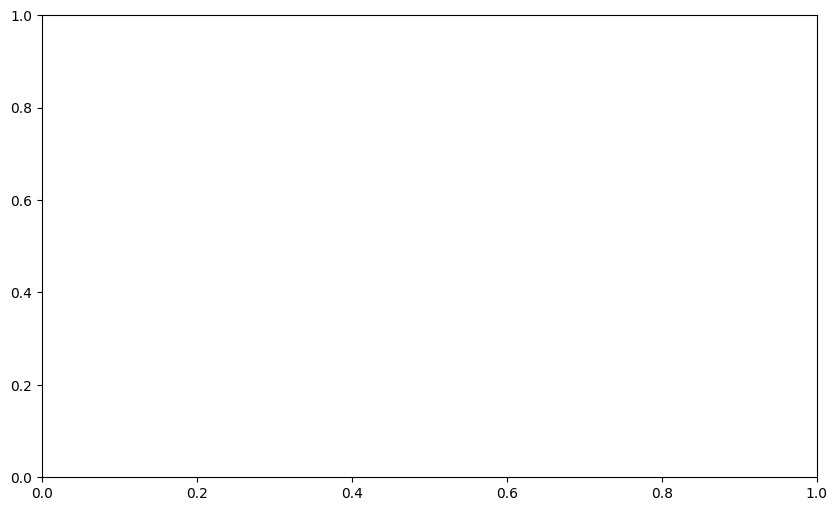

In [84]:
import matplotlib.pyplot as plt

# Assuming filtered_emissions_data2 and electricity_sums_by_year are already loaded

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjusted figsize for better readability

# Plot CO2 on primary Y-axis (2000-2023)
ax1.plot(filtered_emissions_data2['year'], filtered_emissions_data2['C02 due to transport (in tonne)'],
         color='tab:red', marker='o', label='CO2 Emissions')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('CO2 due to Transport (tonne)', color='tab:red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create secondary Y-axis for % of EVs (2000-2023)
ax2 = ax1.twinx()
ax2.plot(electricity_sums_by_year['year'], electricity_sums_by_year['% of EV'],
         color='tab:blue', marker='x', label='Percentage of EVs')
ax2.set_ylabel('Percentage of EVs', color='tab:blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Set x-axis limits to 2000-2023
ax1.set_xlim(2008, 2023)

# Title and layout
plt.title('CO2 Emissions vs Percentage of EVs (2008-2023)', fontsize=14)
plt.grid(True)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')  # Adjust legend location as needed

plt.tight_layout()
plt.show()

KeyError: 'year'

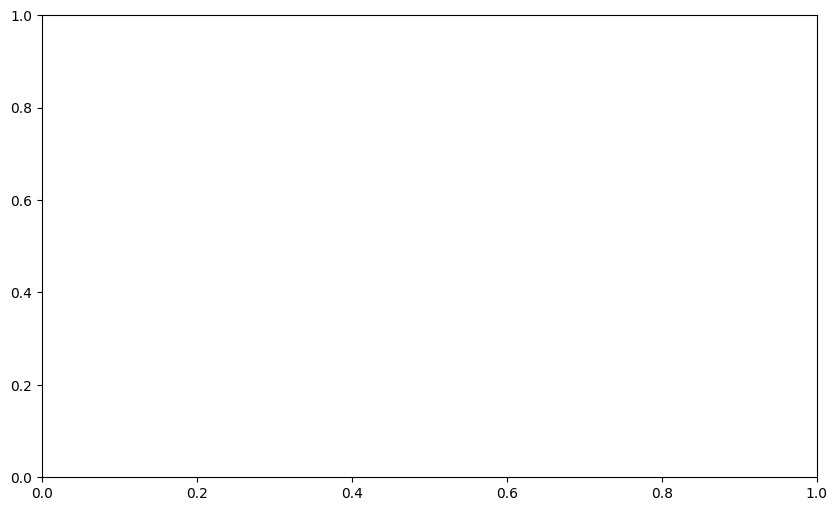

In [85]:
import matplotlib.pyplot as plt

# Assuming filtered_emissions_data2 and electricity_sums_by_year are already loaded

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjusted figsize for better readability

# Plot CO2 on primary Y-axis (2000-2023)
ax1.plot(filtered_emissions_data2['year'], filtered_emissions_data2['Emission of N02 due to transport in 1000 tonne'],
         color='tab:red', marker='o', label='NO2 Emissions')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('NO2 due to Transport (tonne)', color='tab:red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create secondary Y-axis for % of EVs (2000-2023)
ax2 = ax1.twinx()
ax2.plot(electricity_sums_by_year['year'], electricity_sums_by_year['% of EV'],
         color='tab:blue', marker='x', label='Percentage of EVs')
ax2.set_ylabel('Percentage of EVs', color='tab:blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Set x-axis limits to 2000-2023
ax1.set_xlim(2008, 2023)

# Title and layout
plt.title('NO2 Emissions vs Percentage of EVs (2008-2023)', fontsize=14)
plt.grid(True)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')  # Adjust legend location as needed

plt.tight_layout()
plt.show()

KeyError: 'year'

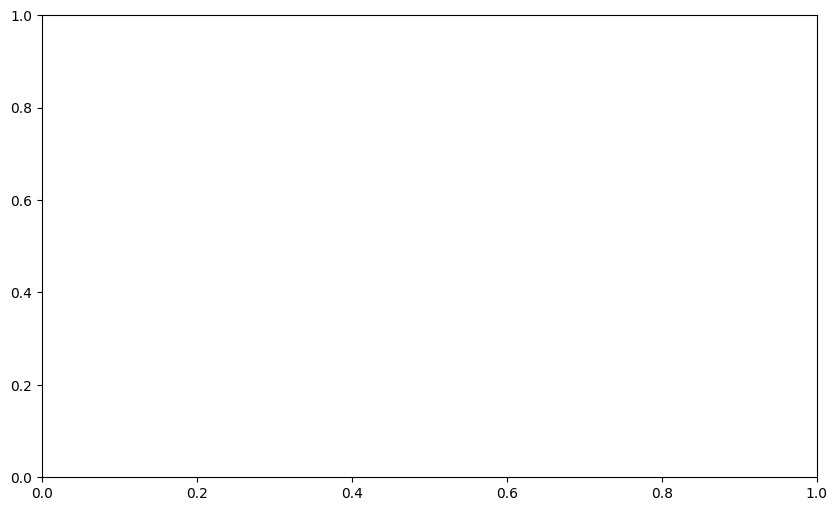

In [86]:
import matplotlib.pyplot as plt

# Assuming filtered_emissions_data2 and electricity_sums_by_year are already loaded

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjusted figsize for better readability

# Plot CO2 on primary Y-axis (2000-2023)
ax1.plot(filtered_emissions_data2['year'], filtered_emissions_data2['PM 10 due to transport in tonne'],
         color='tab:red', marker='o', label='PM 10 Emissions')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('PM 10 due to Transport (tonne)', color='tab:red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create secondary Y-axis for % of EVs (2000-2023)
ax2 = ax1.twinx()
ax2.plot(electricity_sums_by_year['year'], electricity_sums_by_year['% of EV'],
         color='tab:blue', marker='x', label='Percentage of EVs')
ax2.set_ylabel('Percentage of EVs', color='tab:blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Set x-axis limits to 2000-2023
ax1.set_xlim(2008, 2023)

# Title and layout
plt.title('PM 10 Emissions vs Percentage of EVs (2008-2023)', fontsize=14)
plt.grid(True)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')  # Adjust legend location as needed

plt.tight_layout()
plt.show()

## Air quality per Canton

In [88]:
import requests
url = "https://raw.githubusercontent.com/Udzf/EV/main/air_quality_per_canton.csv"  # Raw content URL for CSV file
response = requests.get(url)
data = response.content.decode('utf-8')  # Decode content using UTF-8
air_quality_per_canton = pd.read_csv(io.StringIO(data))

# Display the first few rows of the DataFrame
print(air_quality_per_canton.head(20))

    Canton  Year         PM 10           NO2
0      Zug  2007 20.4000000000 32.2000000000
1      Zug  2008 19.6000000000 33.5000000000
2      Zug  2009 20.6000000000 33.3000000000
3      Zug  2010 22.7000000000 33.7000000000
4      Zug  2011 23.8000000000 31.7000000000
5      Zug  2012 18.4000000000 32.3000000000
6      Zug  2013 20.9000000000 33.1000000000
7      Zug  2014 18.2000000000 30.7000000000
8      Zug  2015 19.8000000000 32.6000000000
9      Zug  2016 15.4000000000 28.8000000000
10     Zug  2017 14.0000000000 27.3000000000
11     Zug  2018 16.7000000000 25.2000000000
12     Zug  2019 15.8000000000           NaN
13     Zug  2020 12.5000000000 22.0000000000
14     Zug  2021 13.0000000000 21.1000000000
15     Zug  2022 13.8000000000 20.0000000000
16  Zürich  2007 24.0000000000 35.4000000000
17  Zürich  2008 23.0000000000 35.6000000000
18  Zürich  2009 24.0000000000 36.9000000000
19  Zürich  2010 22.0000000000 36.1000000000


In [89]:
# Merge the DataFrames on 'Year' and 'Canton'
merged_data3 = pd.merge(filtered_data, air_quality_per_canton, on=['Year', 'Canton'], how='inner')

# Display the first few rows of the merged DataFrame
print(merged_data3.tail(40))

    Year  Canton   Percentage         PM 10           NO2
56  2015     Uri 0.1924746198 15.1000000000 25.2000000000
57  2016     Uri 0.2680765507 11.5000000000 21.3000000000
58  2017     Uri 0.2718689151 12.8000000000 20.5000000000
59  2018     Uri 0.3196396789 13.6000000000 19.5000000000
60  2019     Uri 0.4049163292 11.9000000000 18.0000000000
61  2020     Uri 0.5570931800 12.6000000000 16.6000000000
62  2021     Uri 0.9067266465 11.4000000000 16.1000000000
63  2022     Uri 1.3878153327 12.9000000000 16.9000000000
64  2007     Zug 0.0364972690 20.4000000000 32.2000000000
65  2008     Zug 0.0441804526 19.6000000000 33.5000000000
66  2009     Zug 0.0537109375 20.6000000000 33.3000000000
67  2010     Zug 0.0642024040 22.7000000000 33.7000000000
68  2011     Zug 0.1570892290 23.8000000000 31.7000000000
69  2012     Zug 0.1782511211 18.4000000000 32.3000000000
70  2013     Zug 0.1849662902 20.9000000000 33.1000000000
71  2014     Zug 0.2479541125 18.2000000000 30.7000000000
72  2015     Z

# Correlation between EV and air quality in Switzerland

In [90]:
# Reset index if 'year' is the index in filtered_emissions_data2
if filtered_emissions_data2.index.name == 'year':
    filtered_emissions_data2 = filtered_emissions_data2.reset_index()

# Rename 'Year' to 'year' in electricity_sums_by_year
electricity_sums_by_year = electricity_sums_by_year.rename(columns={'Year': 'year'})

# Convert 'year' to int in both DataFrames
filtered_emissions_data2['year'] = filtered_emissions_data2['year'].astype(int)
electricity_sums_by_year['year'] = electricity_sums_by_year['year'].astype(int)

# Merge
merged_data = pd.merge(filtered_emissions_data2, electricity_sums_by_year, on='year', how='left')

In [91]:
print(merged_data)

    year  C02 due to transport (in tonne)  \
0   2000                    15.8000000000   
1   2001                    15.5000000000   
2   2002                    15.5000000000   
3   2003                    15.6000000000   
4   2004                    15.8000000000   
5   2005                    15.9000000000   
6   2006                    16.0000000000   
7   2007                    16.3000000000   
8   2008                    16.6000000000   
9   2009                    16.4000000000   
10  2010                    16.3000000000   
11  2011                    16.1000000000   
12  2012                    16.3000000000   
13  2013                    16.2000000000   
14  2014                    16.1000000000   
15  2015                    15.3000000000   
16  2016                    15.2000000000   
17  2017                    14.9000000000   
18  2018                    14.9000000000   
19  2019                    14.8000000000   
20  2020                    13.5000000000   
21  2021  

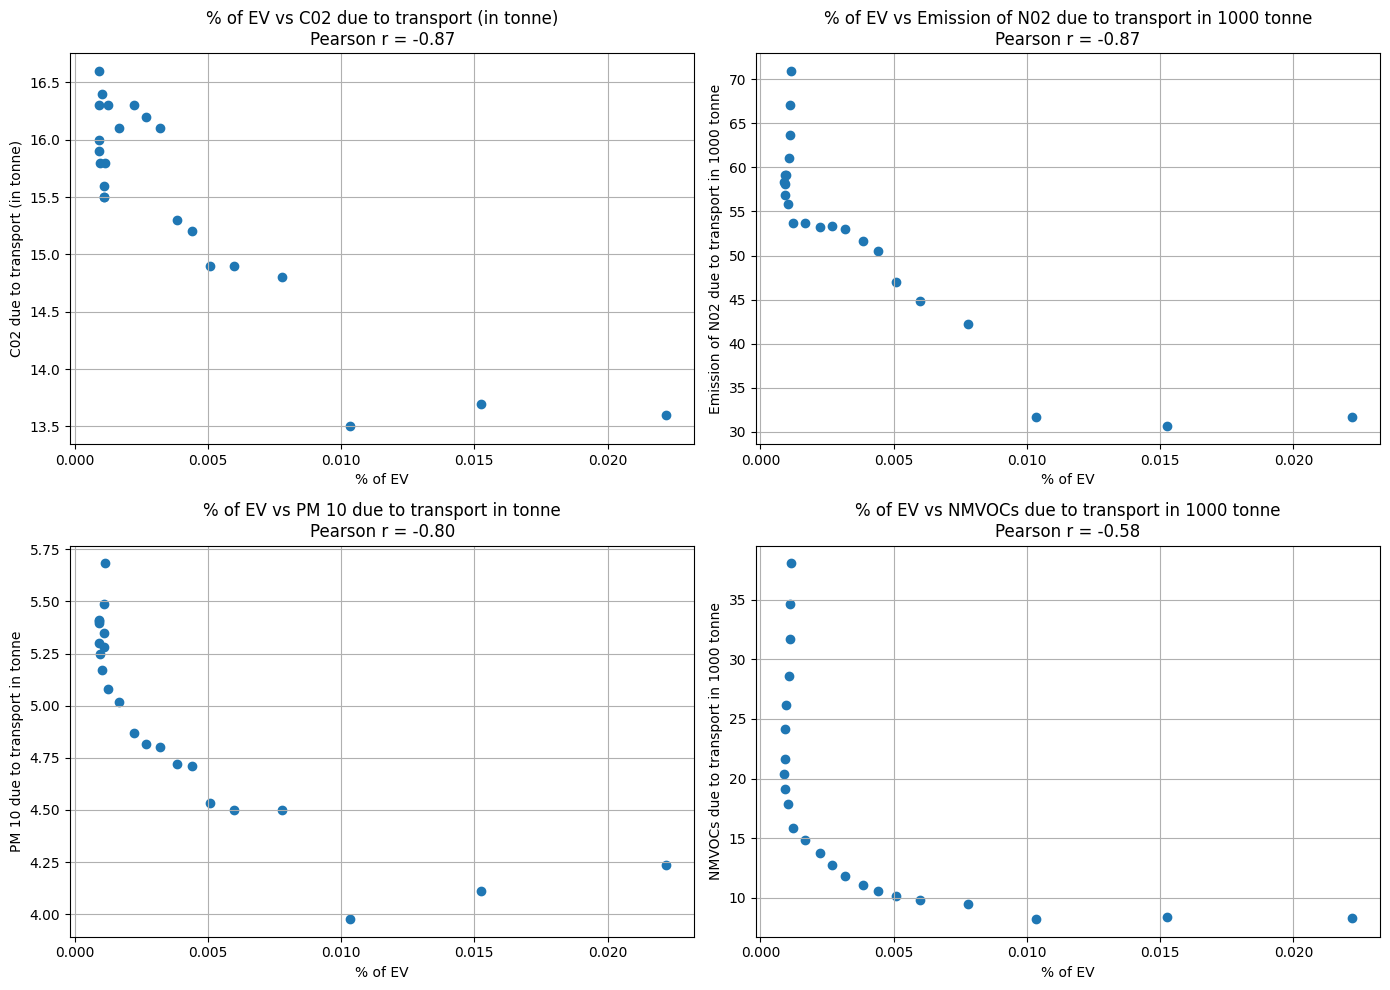

In [92]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# List of target emission columns
target_columns = [
    'C02 due to transport (in tonne)',
    'Emission of N02 due to transport in 1000 tonne',
    'PM 10 due to transport in tonne',
    'NMVOCs due to transport in 1000 tonne'
]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop over each target emission column
for idx, col in enumerate(target_columns):
    ax = axes[idx]
    # Scatter plot
    ax.scatter(merged_data['% of EV'], merged_data[col])
    # Calculate Pearson correlation
    corr_coef, _ = pearsonr(merged_data['% of EV'], merged_data[col])
    # Plot title with correlation coefficient
    ax.set_title(f'% of EV vs {col}\nPearson r = {corr_coef:.2f}')
    ax.set_xlabel('% of EV')
    ax.set_ylabel(col)
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

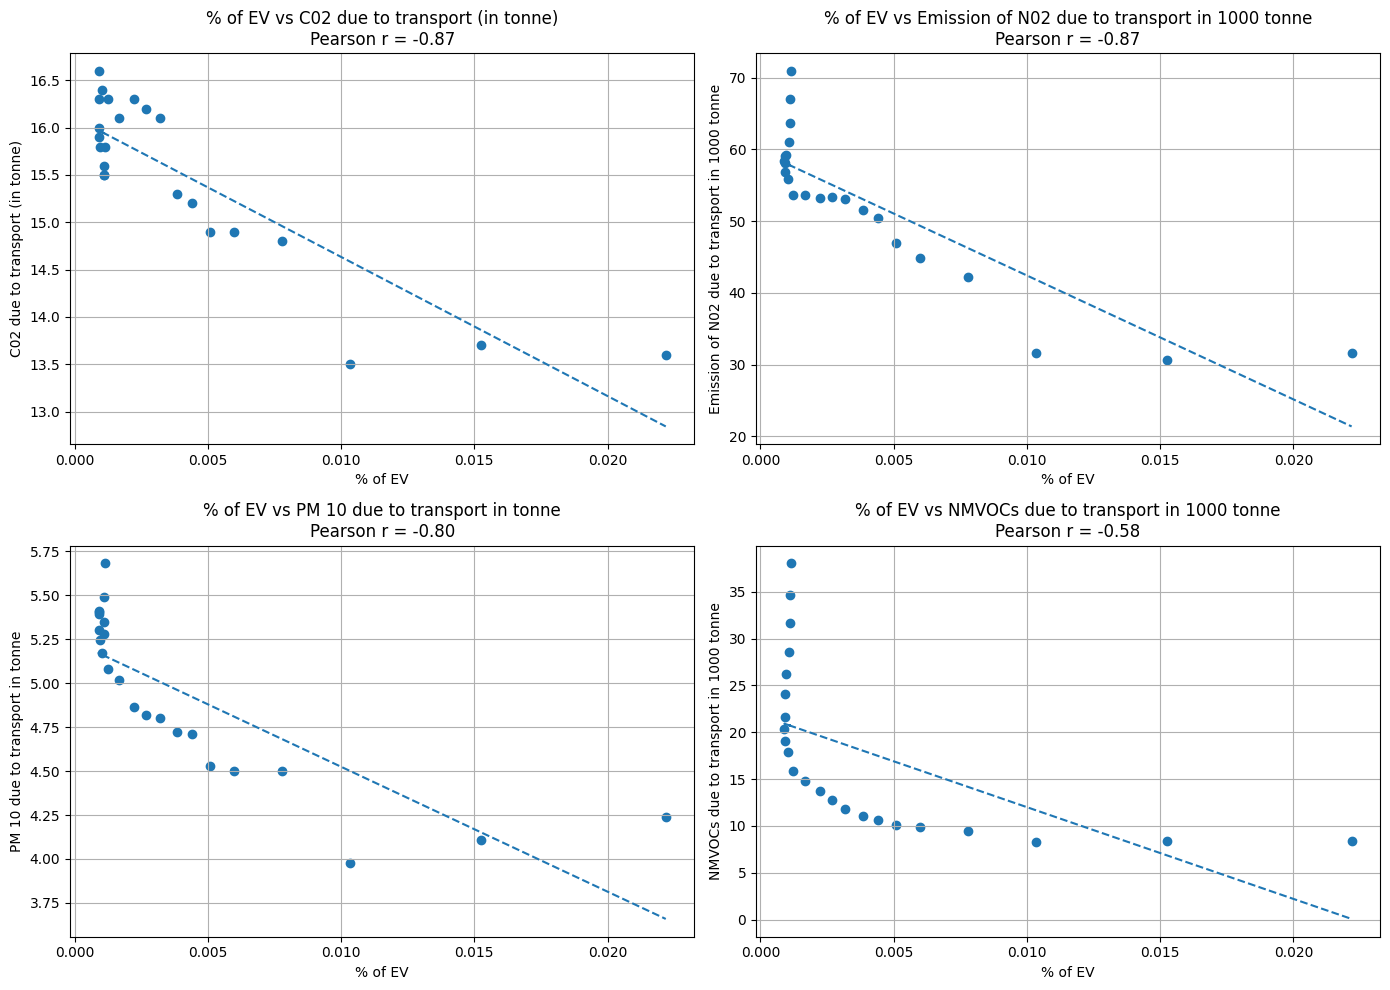

In [93]:
import matplotlib.pyplot as plt
import numpy as np  # <-- you need numpy for line fitting
from scipy.stats import pearsonr

# List of target emission columns
target_columns = [
    'C02 due to transport (in tonne)',
    'Emission of N02 due to transport in 1000 tonne',
    'PM 10 due to transport in tonne',
    'NMVOCs due to transport in 1000 tonne'
]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop over each target emission column
for idx, col in enumerate(target_columns):
    ax = axes[idx]
    x = merged_data['% of EV']
    y = merged_data[col]

    # Scatter plot
    ax.scatter(x, y)

    # Calculate Pearson correlation
    corr_coef, _ = pearsonr(x, y)

    # Fit and plot trend line
    m, b = np.polyfit(x, y, 1)  # 1 = linear
    ax.plot(x, m*x + b, linestyle='--')  # Dashed line for the trend

    # Plot title with correlation coefficient
    ax.set_title(f'% of EV vs {col}\nPearson r = {corr_coef:.2f}')
    ax.set_xlabel('% of EV')
    ax.set_ylabel(col)
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Features and target
X = merged_data[['% of EV']]  # Feature (independent variable)

targets = [
    'C02 due to transport (in tonne)',
    'Emission of N02 due to transport in 1000 tonne',
    'PM 10 due to transport in tonne',
    'NMVOCs due to transport in 1000 tonne'
]

for target in targets:
    y = merged_data[target]  # Target (dependent variable)

    # Initialize and fit model
    model = LinearRegression()
    model.fit(X, y)

    # Predictions
    y_pred = model.predict(X)

    # Evaluation
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Print results
    print(f"Predicting {target}:")
    print(f"   R² Score: {r2:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print()

Predicting C02 due to transport (in tonne):
   R² Score: 0.75
   RMSE: 0.44

Predicting Emission of N02 due to transport in 1000 tonne:
   R² Score: 0.75
   RMSE: 5.20

Predicting PM 10 due to transport in tonne:
   R² Score: 0.64
   RMSE: 0.28

Predicting NMVOCs due to transport in 1000 tonne:
   R² Score: 0.34
   RMSE: 7.17



Results for C02 due to transport (in tonne):
  Linear R^2: 0.752, RMSE: 0.440, Slope: -147.072
  Polynomial R^2: 0.832, RMSE: 0.362




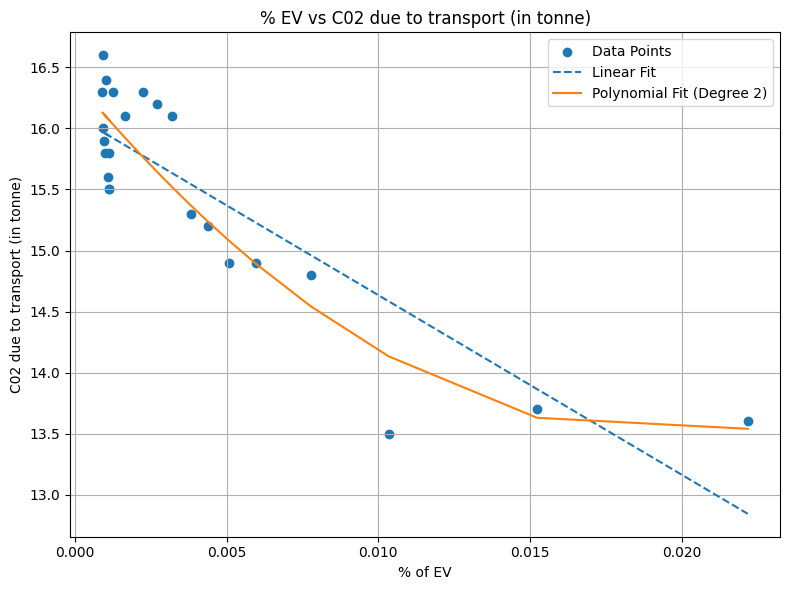

Results for Emission of N02 due to transport in 1000 tonne:
  Linear R^2: 0.750, RMSE: 5.201, Slope: -1727.510
  Polynomial R^2: 0.873, RMSE: 3.709




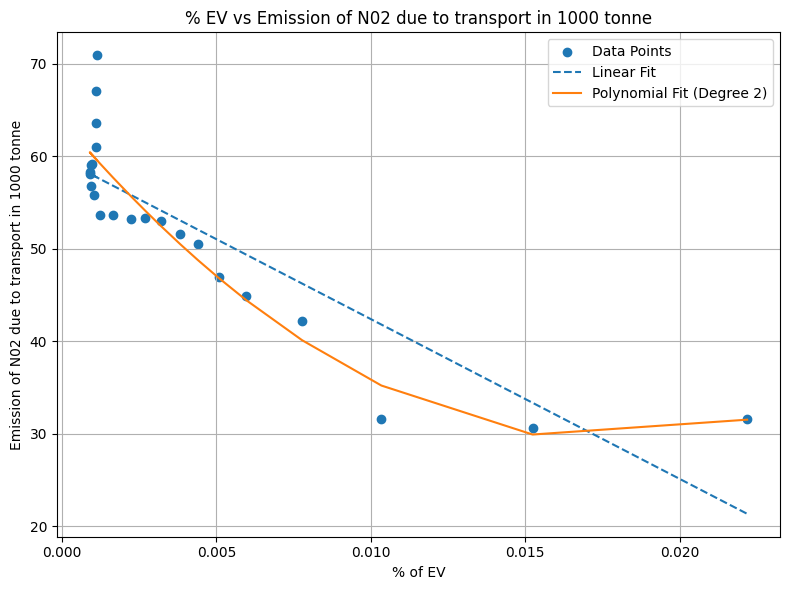

Results for PM 10 due to transport in tonne:
  Linear R^2: 0.644, RMSE: 0.275, Slope: -71.113
  Polynomial R^2: 0.899, RMSE: 0.146




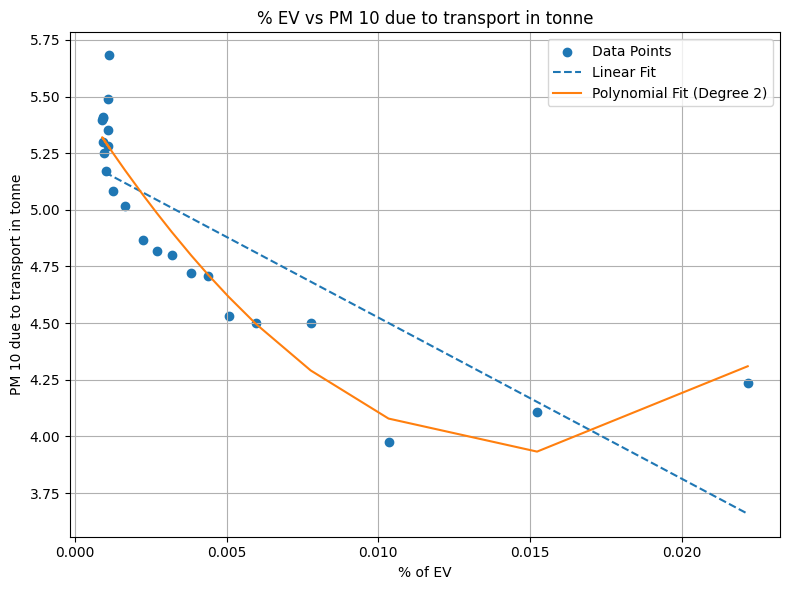

Results for NMVOCs due to transport in 1000 tonne:
  Linear R^2: 0.336, RMSE: 7.173, Slope: -979.551
  Polynomial R^2: 0.546, RMSE: 5.932




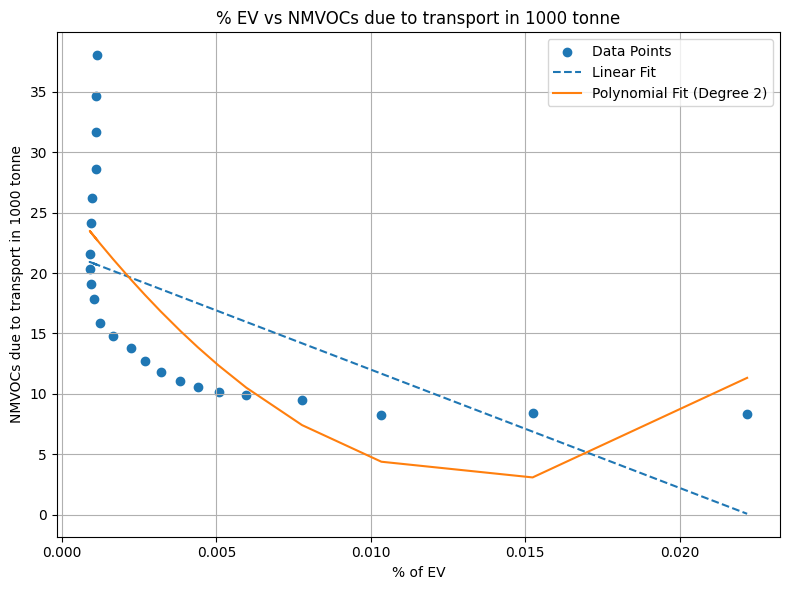

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Define the pollutants you want to analyze
targets = [
    'C02 due to transport (in tonne)',
    'Emission of N02 due to transport in 1000 tonne',
    'PM 10 due to transport in tonne',
    'NMVOCs due to transport in 1000 tonne'
]

# Initialize PolynomialFeatures object
poly = PolynomialFeatures(degree=2)

# Define the function FIRST
def analyze_pollutants(data, feature='% of EV'):
    for target in targets:
        X = data[[feature]].values
        y = data[target].values

        # Linear Regression
        model_linear = LinearRegression()
        model_linear.fit(X, y)
        y_pred_linear = model_linear.predict(X)

        r2_linear = r2_score(y, y_pred_linear)
        rmse_linear = np.sqrt(mean_squared_error(y, y_pred_linear))

        # Polynomial Regression (degree 2)
        X_poly = poly.fit_transform(X)
        model_poly = LinearRegression()
        model_poly.fit(X_poly, y)
        y_pred_poly = model_poly.predict(X_poly)

        r2_poly = r2_score(y, y_pred_poly)
        rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))

        # Print results
        print(f"Results for {target}:")
        print(f"  Linear R^2: {r2_linear:.3f}, RMSE: {rmse_linear:.3f}, Slope: {model_linear.coef_[0]:.3f}")
        print(f"  Polynomial R^2: {r2_poly:.3f}, RMSE: {rmse_poly:.3f}")
        print("\n")

        # Plot
        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, label='Data Points')
        plt.plot(X, y_pred_linear, label='Linear Fit', linestyle='--')
        plt.plot(X, y_pred_poly, label='Polynomial Fit (Degree 2)', linestyle='-')
        plt.title(f'% EV vs {target}')
        plt.xlabel('% of EV')
        plt.ylabel(target)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# ✅ NOW you call the function
analyze_pollutants(merged_data)

# Correlation between EV and air quality per canton

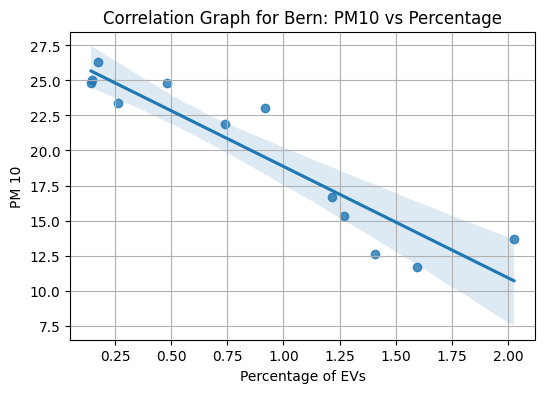

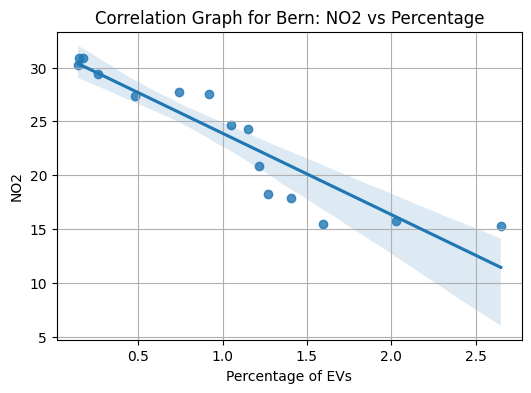

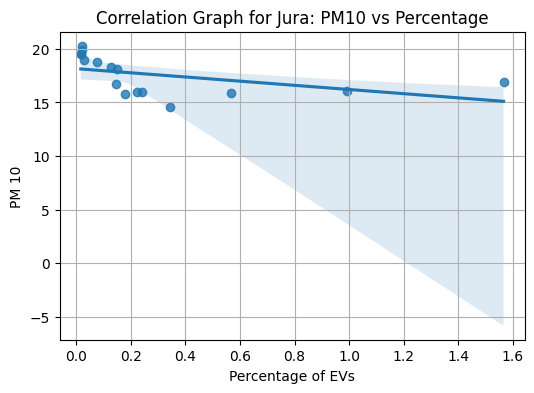

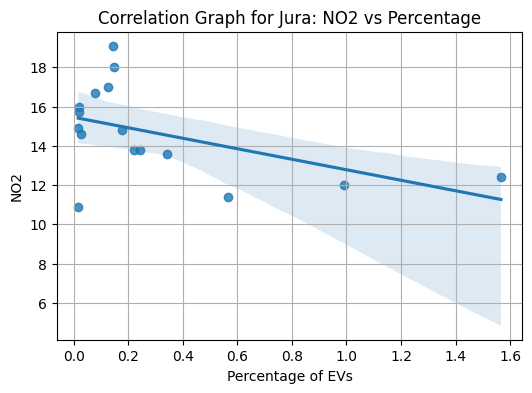

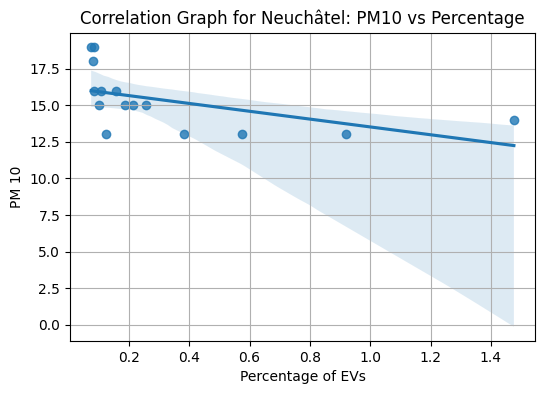

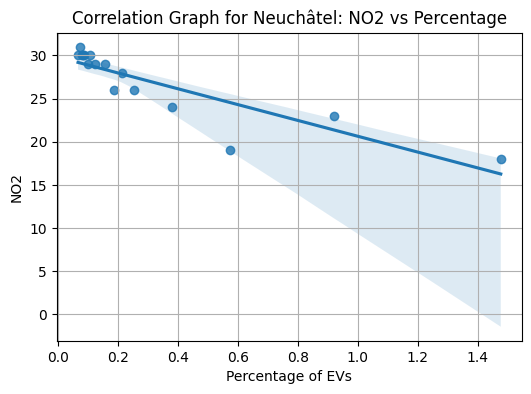

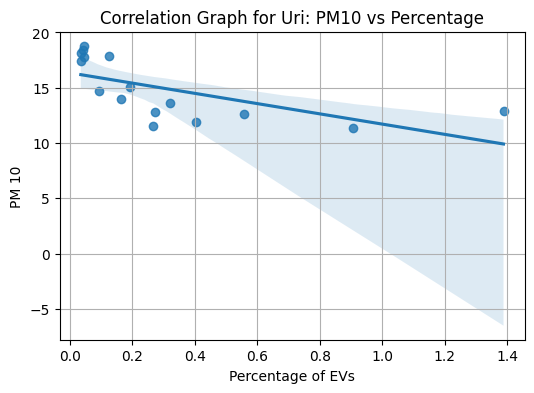

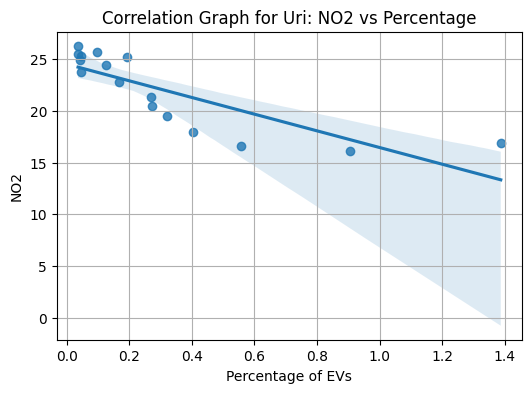

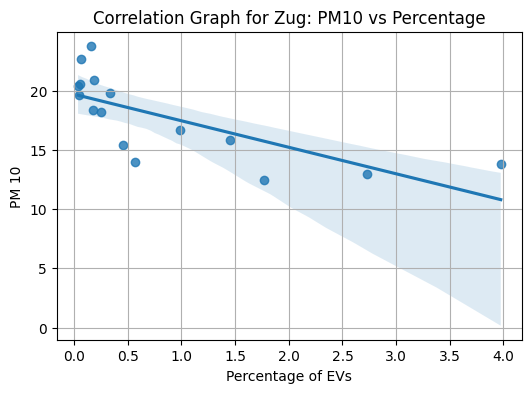

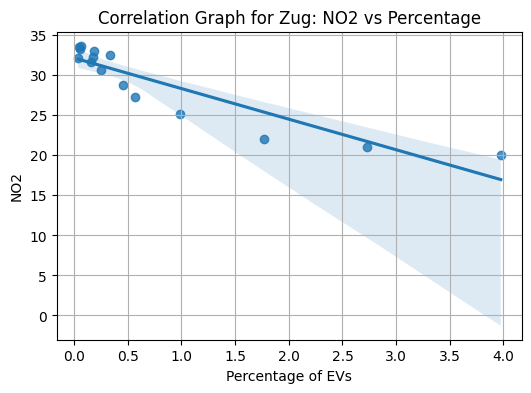

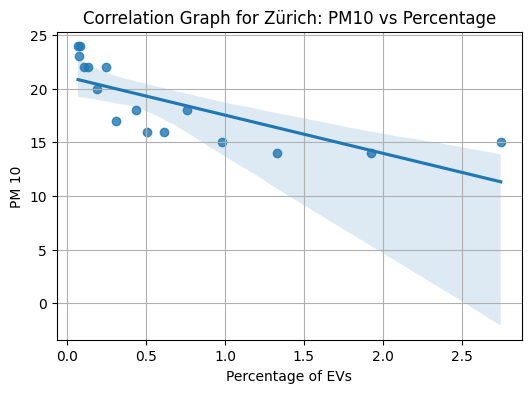

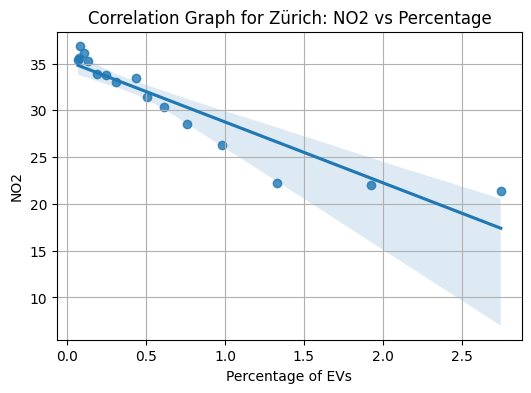

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by canton
grouped_data = merged_data3.groupby('Canton')

# Function to plot correlation graph
def plot_correlation_graph(data, pollutant, title):
    plt.figure(figsize=(6, 4))  # Adjust figsize as needed
    sns.regplot(x='Percentage', y=pollutant, data=data)  # Use regplot for scatter with trend line
    plt.title(title)
    plt.xlabel('Percentage of EVs')
    plt.ylabel(pollutant)
    plt.grid(True)
    plt.show()

# Iterate through cantons and plot graphs
for canton, data in grouped_data:
    plot_correlation_graph(data, 'PM 10', f'Correlation Graph for {canton}: PM10 vs Percentage')
    plot_correlation_graph(data, 'NO2', f'Correlation Graph for {canton}: NO2 vs Percentage')

# The Norway Case


In [97]:
url = "https://github.com/Udzf/EV/raw/main/Norway_data.csv"  # Direct link to raw content (updated URL)
response = requests.get(url)
data = response.content.decode('utf-8')  # Decode content using UTF-8
Norway_data = pd.read_csv(io.StringIO(data))

# Display the first few rows of the DataFrame
print(Norway_data.head())

   Year  Number_of_cars  Number_electric_cars  Percentage_of_EVs  \
0  2008         3352344                  2834       0.0008453790   
1  2009         3413877                  3222       0.0009437950   
2  2010         3494873                  3946       0.0011290830   
3  2011         3581905                  6185       0.0017267350   
4  2012         3671885                 10706       0.0029156690   

   PM10_due_to_transport_(tonne)  CO2_due_to_transport_(tonne)  \
0                           2064                          9807   
1                           1873                          9656   
2                           1638                          9903   
3                           1495                          9834   
4                           1385                          9866   

   N2O_due_to_transport_(tonne)  PM10_total_(tonne)  CO2_total_(tonne)  \
0                           211               58229              44692   
1                           210               

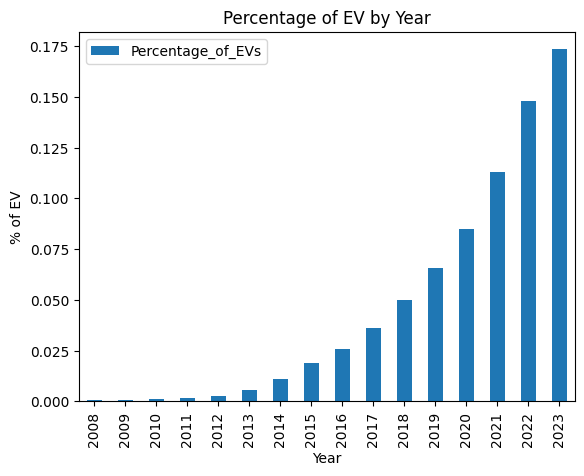

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming electricity_sums_by_year is your DataFrame
Norway_data.plot(x='Year', y='Percentage_of_EVs', kind='bar')
plt.xlabel('Year')
plt.ylabel('% of EV')
plt.title('Percentage of EV by Year')
plt.show()


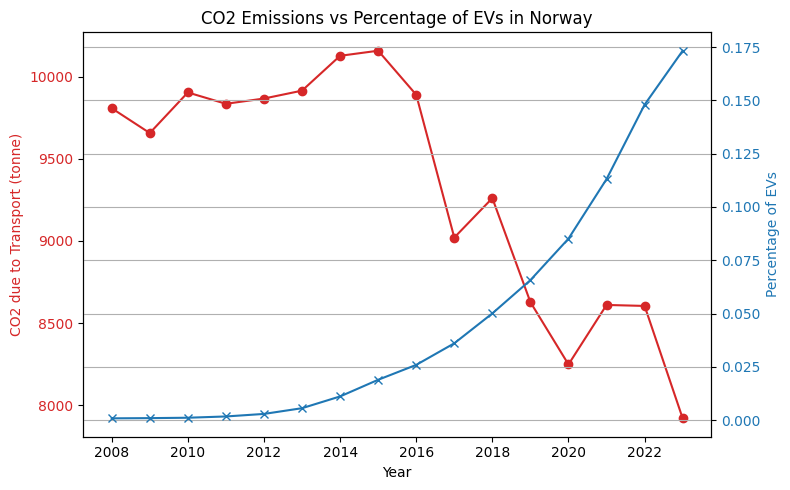

In [99]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot CO2 on primary Y-axis
ax1.plot(Norway_data['Year'], Norway_data['CO2_due_to_transport_(tonne)'], color='tab:red', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 due to Transport (tonne)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create secondary Y-axis for % of EVs
ax2 = ax1.twinx()
ax2.plot(Norway_data['Year'], Norway_data['Percentage_of_EVs'], color='tab:blue', marker='x')
ax2.set_ylabel('Percentage of EVs', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and layout
plt.title('CO2 Emissions vs Percentage of EVs in Norway')
plt.grid(True)
plt.tight_layout()
plt.show()

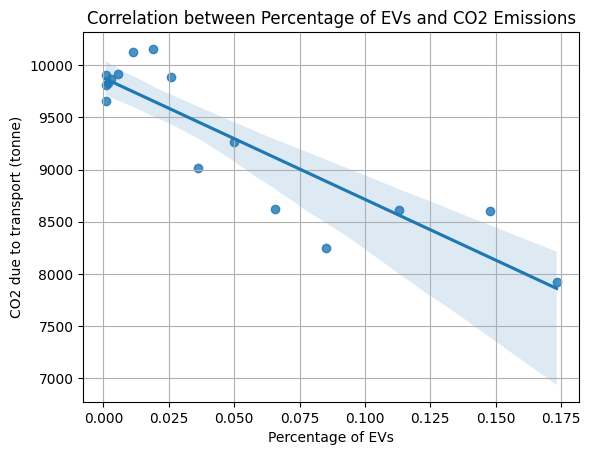

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a trendline (regression line)
sns.regplot(x='Percentage_of_EVs', y='CO2_due_to_transport_(tonne)', data=Norway_data)

plt.xlabel('Percentage of EVs')
plt.ylabel('CO2 due to transport (tonne)')
plt.title('Correlation between Percentage of EVs and CO2 Emissions')
plt.grid(True)  # Add a grid for better readability
plt.show()

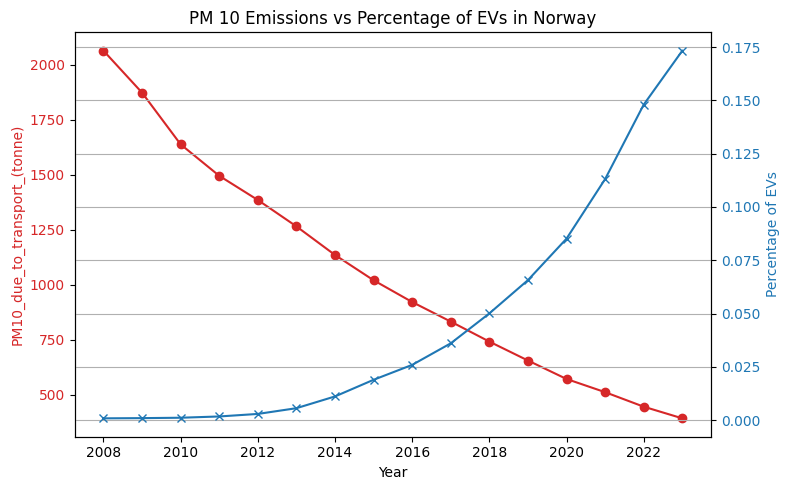

In [101]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot CO2 on primary Y-axis
ax1.plot(Norway_data['Year'], Norway_data['PM10_due_to_transport_(tonne)'], color='tab:red', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('PM10_due_to_transport_(tonne)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create secondary Y-axis for % of EVs
ax2 = ax1.twinx()
ax2.plot(Norway_data['Year'], Norway_data['Percentage_of_EVs'], color='tab:blue', marker='x')
ax2.set_ylabel('Percentage of EVs', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and layout
plt.title('PM 10 Emissions vs Percentage of EVs in Norway')
plt.grid(True)
plt.tight_layout()
plt.show()

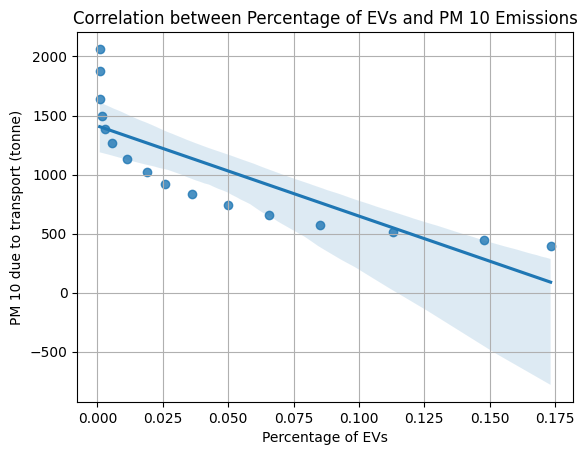

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a trendline (regression line)
sns.regplot(x='Percentage_of_EVs', y='PM10_due_to_transport_(tonne)', data=Norway_data)

plt.xlabel('Percentage of EVs')
plt.ylabel('PM 10 due to transport (tonne)')
plt.title('Correlation between Percentage of EVs and PM 10 Emissions')
plt.grid(True)  # Add a grid for better readability
plt.show()

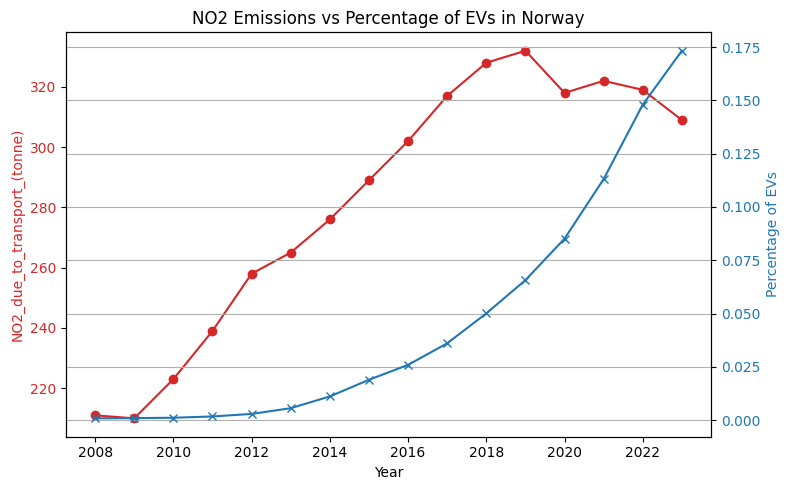

In [103]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot CO2 on primary Y-axis
ax1.plot(Norway_data['Year'], Norway_data['N2O_due_to_transport_(tonne)'], color='tab:red', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('NO2_due_to_transport_(tonne)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create secondary Y-axis for % of EVs
ax2 = ax1.twinx()
ax2.plot(Norway_data['Year'], Norway_data['Percentage_of_EVs'], color='tab:blue', marker='x')
ax2.set_ylabel('Percentage of EVs', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and layout
plt.title('NO2 Emissions vs Percentage of EVs in Norway')
plt.grid(True)
plt.tight_layout()
plt.show()

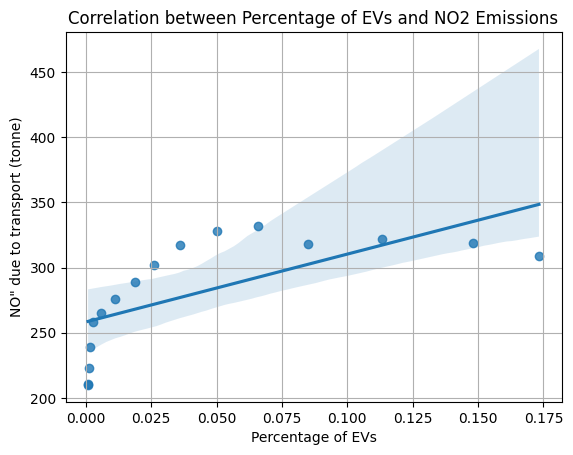

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a trendline (regression line)
sns.regplot(x='Percentage_of_EVs', y='N2O_due_to_transport_(tonne)', data=Norway_data)

plt.xlabel('Percentage of EVs')
plt.ylabel('NO" due to transport (tonne)')
plt.title('Correlation between Percentage of EVs and NO2 Emissions')
plt.grid(True)  # Add a grid for better readability
plt.show()

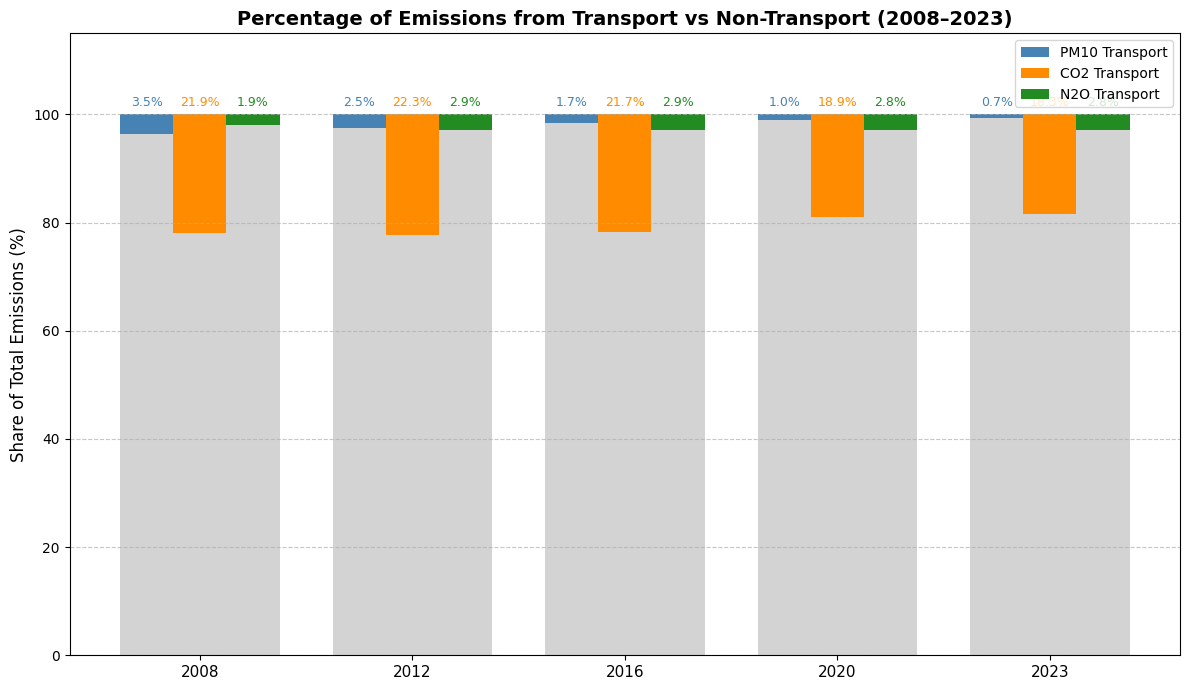

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for selected years
data = {
    'Year': [2008, 2012, 2016, 2020, 2023],
    'PM10_due_to_transport_(tonne)': [2064, 1385, 921, 571, 392],
    'PM10_total_(tonne)': [58229, 56015, 55756, 57082, 58662],
    'CO2_due_to_transport_(tonne)': [9807, 9866, 9511, 7967, 7500],
    'CO2_total_(tonne)': [44692, 44258, 43826, 42112, 40898],
    'N2O_due_to_transport_(tonne)': [211, 258, 255, 241, 239],
    'N2O_total_(tonne)': [10983, 8759, 8947, 8523, 8479]
}

# Load into DataFrame
df = pd.DataFrame(data)

# Calculate transport and non-transport percentages
df['PM10_transport'] = df['PM10_due_to_transport_(tonne)'] / df['PM10_total_(tonne)'] * 100
df['CO2_transport'] = df['CO2_due_to_transport_(tonne)'] / df['CO2_total_(tonne)'] * 100
df['N2O_transport'] = df['N2O_due_to_transport_(tonne)'] / df['N2O_total_(tonne)'] * 100

df['PM10_non_transport'] = 100 - df['PM10_transport']
df['CO2_non_transport'] = 100 - df['CO2_transport']
df['N2O_non_transport'] = 100 - df['N2O_transport']

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.25
x = range(len(df['Year']))

# Plot stacked bars
ax.bar([i - bar_width for i in x], df['PM10_non_transport'], width=bar_width, color='lightgrey')
ax.bar([i - bar_width for i in x], df['PM10_transport'], width=bar_width,
       bottom=df['PM10_non_transport'], color='steelblue', label='PM10 Transport')

ax.bar(x, df['CO2_non_transport'], width=bar_width, color='lightgrey')
ax.bar(x, df['CO2_transport'], width=bar_width,
       bottom=df['CO2_non_transport'], color='darkorange', label='CO2 Transport')

ax.bar([i + bar_width for i in x], df['N2O_non_transport'], width=bar_width, color='lightgrey')
ax.bar([i + bar_width for i in x], df['N2O_transport'], width=bar_width,
       bottom=df['N2O_non_transport'], color='forestgreen', label='N2O Transport')

# Customize labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(df['Year'], fontsize=11)
ax.set_ylabel('Share of Total Emissions (%)', fontsize=12)
ax.set_title('Percentage of Emissions from Transport vs Non-Transport (2008–2023)', fontsize=14, weight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels for transport % above each colored bar
for i in x:
    ax.text(i - bar_width, 100 + 1, f"{df['PM10_transport'][i]:.1f}%", ha='center', va='bottom', fontsize=9, color='steelblue')
    ax.text(i, 100 + 1, f"{df['CO2_transport'][i]:.1f}%", ha='center', va='bottom', fontsize=9, color='darkorange')
    ax.text(i + bar_width, 100 + 1, f"{df['N2O_transport'][i]:.1f}%", ha='center', va='bottom', fontsize=9, color='forestgreen')

# Final touches
plt.ylim(0, 115)
plt.tight_layout()
plt.show()

# Multivariable OLS


In [106]:
import requests
import pandas as pd
import io

url = "https://github.com/Udzf/EV/raw/main/df_data.csv"  # Raw content URL for CSV file
response = requests.get(url)
data = response.content.decode('utf-8')  # Decode content using UTF-8
df_data = pd.read_csv(io.StringIO(data))

# Display the first few rows of the DataFrame
print(df_data.head(23))

    year      % of EV  Number of vehicles register in CH  % of diesel in CH  \
0   2000 0.0011320000                            4584718       0.1091460000   
1   2001 0.0011040000                            4706561       0.1162130000   
2   2002 0.0011040000                            4808916       0.1251760000   
3   2003 0.0010890000                            4888296       0.1354800000   
4   2004 0.0009690000                            4969193       0.1479880000   
5   2005 0.0009360000                            5040120       0.1612730000   
6   2006 0.0009120000                            5108064       0.1753370000   
7   2007 0.0008990000                            5186343       0.1903300000   
8   2008 0.0009330000                            5245145       0.2023540000   
9   2009 0.0010340000                            5273297       0.2163650000   
10  2010 0.0012400000                            5359955       0.2302940000   
11  2011 0.0016560000                            548

In [107]:
import pandas as pd

   # Set display option for floats to show 10 decimal places
pd.set_option('display.float_format', '{:.10f}'.format)

# Merge the DataFrames on 'year'
merged_data2 = pd.merge(filtered_emissions_data2, df_data, on='year', how='left')
print(merged_data2)

    year  C02 due to transport (in tonne)  \
0   2000                    15.8000000000   
1   2001                    15.5000000000   
2   2002                    15.5000000000   
3   2003                    15.6000000000   
4   2004                    15.8000000000   
5   2005                    15.9000000000   
6   2006                    16.0000000000   
7   2007                    16.3000000000   
8   2008                    16.6000000000   
9   2009                    16.4000000000   
10  2010                    16.3000000000   
11  2011                    16.1000000000   
12  2012                    16.3000000000   
13  2013                    16.2000000000   
14  2014                    16.1000000000   
15  2015                    15.3000000000   
16  2016                    15.2000000000   
17  2017                    14.9000000000   
18  2018                    14.9000000000   
19  2019                    14.8000000000   
20  2020                    13.5000000000   
21  2021  

In [108]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

# Set display option for floats to show 10 decimal places
pd.set_option('display.float_format', '{:.10f}'.format)

# Merge the DataFrames on 'year'
merged_data2 = pd.merge(filtered_emissions_data2, df_data, on='year', how='left')

# Keep 'year' aside
year_col = merged_data2["year"]

# Select features to scale (exclude 'year')
features_to_scale = merged_data2.drop(columns=["year"])

# Initialize the scaler
scaler = MinMaxScaler() # Use MinMaxScaler for normalization between 0 and 1

# Scale the data to 0–1
scaled_array = scaler.fit_transform(features_to_scale)

# Create a new DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_array, columns=features_to_scale.columns)

# Add back the 'year' column
scaled_df["year"] = year_col.values

# Reassign to merged_data2
merged_data2 = scaled_df

print(merged_data2)

    C02 due to transport (in tonne)  \
0                      0.7419354839   
1                      0.6451612903   
2                      0.6451612903   
3                      0.6774193548   
4                      0.7419354839   
5                      0.7741935484   
6                      0.8064516129   
7                      0.9032258065   
8                      1.0000000000   
9                      0.9354838710   
10                     0.9032258065   
11                     0.8387096774   
12                     0.9032258065   
13                     0.8709677419   
14                     0.8387096774   
15                     0.5806451613   
16                     0.5483870968   
17                     0.4516129032   
18                     0.4516129032   
19                     0.4193548387   
20                     0.0000000000   
21                     0.0645161290   
22                     0.0322580645   

    Emission of N02 due to transport in 1000 tonne  \
0        

In [176]:
import statsmodels.formula.api as smf
import pandas as pd

# Assuming you have already loaded and merged your data into merged_data2

# Define the formula for the OLS model
formula = 'Q("C02 due to transport (in tonne)") ~ Q("% of EV")'


# Fit the OLS model
model = smf.ols(formula=formula, data=merged_data2).fit()

# Display results
print(model.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Q("C02 due to transport (in tonne)")   R-squared:                       0.752
Model:                                              OLS   Adj. R-squared:                  0.740
Method:                                   Least Squares   F-statistic:                     63.76
Date:                                  Wed, 14 May 2025   Prob (F-statistic):           8.49e-08
Time:                                          13:03:36   Log-Likelihood:                 12.291
No. Observations:                                    23   AIC:                            -20.58
Df Residuals:                                        21   BIC:                            -18.31
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                   coef    std

In [177]:
import statsmodels.formula.api as smf

# Define the formula with Covid Dummy added
formula = 'Q("PM 10 due to transport in tonne") ~ Q("% of EV")'

# Fit the model
model = smf.ols(formula=formula, data=merged_data2).fit()

# Print summary
print(model.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Q("PM 10 due to transport in tonne")   R-squared:                       0.644
Model:                                              OLS   Adj. R-squared:                  0.627
Method:                                   Least Squares   F-statistic:                     37.98
Date:                                  Wed, 14 May 2025   Prob (F-statistic):           4.10e-06
Time:                                          13:04:20   Log-Likelihood:                 9.2926
No. Observations:                                    23   AIC:                            -14.59
Df Residuals:                                        21   BIC:                            -12.31
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                   coef    std

In [178]:
import statsmodels.formula.api as smf

# Define the formula with Covid Dummy added
formula = 'Q("Emission of N02 due to transport in 1000 tonne") ~ Q("% of EV") '

# Fit the model
model = smf.ols(formula=formula, data=merged_data2).fit()

# Print summary
print(model.summary())

                                             OLS Regression Results                                            
Dep. Variable:     Q("Emission of N02 due to transport in 1000 tonne")   R-squared:                       0.750
Model:                                                             OLS   Adj. R-squared:                  0.738
Method:                                                  Least Squares   F-statistic:                     62.84
Date:                                                 Wed, 14 May 2025   Prob (F-statistic):           9.53e-08
Time:                                                         13:05:22   Log-Likelihood:                 14.468
No. Observations:                                                   23   AIC:                            -24.94
Df Residuals:                                                       21   BIC:                            -22.67
Df Model:                                                            1                                  

In [109]:
import statsmodels.formula.api as smf
import pandas as pd

# Assuming you have already loaded and merged your data into merged_data2

# Define the formula for the OLS model
formula = 'Q("C02 due to transport (in tonne)") ~ Q("% of EV") + Q("Number of vehicles register in CH") + Q("The share (in %) of public transport in total motorized passenger transport") + Q("Precipitation per year in mm") '


# Fit the OLS model
model = smf.ols(formula=formula, data=merged_data2).fit()

# Display results
print(model.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Q("C02 due to transport (in tonne)")   R-squared:                       0.909
Model:                                              OLS   Adj. R-squared:                  0.889
Method:                                   Least Squares   F-statistic:                     45.10
Date:                                  Wed, 14 May 2025   Prob (F-statistic):           3.82e-09
Time:                                          12:48:33   Log-Likelihood:                 23.845
No. Observations:                                    23   AIC:                            -37.69
Df Residuals:                                        18   BIC:                            -32.01
Df Model:                                             4                                         
Covariance Type:                              nonrobust                                         
                              

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # ← this is the correct module for add_constant

X = merged_data2[[
    "% of EV",
    "Number of vehicles register in CH","The share (in %) of public transport in total motorized passenger transport",
    "Precipitation per year in mm"
]]

X = sm.add_constant(X)  # ✅ Correct usage here

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                             feature           VIF
0                                              const 13.4085084267
1                                            % of EV  3.0713977258
2                  Number of vehicles register in CH  3.3782055274
3  The share (in %) of public transport in total ...  1.4766933325
4                       Precipitation per year in mm  1.0916627906


In [111]:
import statsmodels.formula.api as smf

# Define the formula with Covid Dummy added
formula = 'Q("PM 10 due to transport in tonne") ~ Q("% of EV") + Q("% of diesel in CH") + Q("The share (in %) of public transport in total motorized passenger transport") + Q("Precipitation per year in mm")'

# Fit the model
model = smf.ols(formula=formula, data=merged_data2).fit()

# Print summary
print(model.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Q("PM 10 due to transport in tonne")   R-squared:                       0.967
Model:                                              OLS   Adj. R-squared:                  0.960
Method:                                   Least Squares   F-statistic:                     131.9
Date:                                  Wed, 14 May 2025   Prob (F-statistic):           4.50e-13
Time:                                          12:48:34   Log-Likelihood:                 36.649
No. Observations:                                    23   AIC:                            -63.30
Df Residuals:                                        18   BIC:                            -57.62
Df Model:                                             4                                         
Covariance Type:                              nonrobust                                         
                              

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # ← this is the correct module for add_constant

X = merged_data2[[
    "% of EV",
    "% of diesel in CH","The share (in %) of public transport in total motorized passenger transport",
    "Precipitation per year in mm"
]]

X = sm.add_constant(X)  # ✅ Correct usage here

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                             feature           VIF
0                                              const 12.8666616829
1                                            % of EV  2.1563389855
2                                  % of diesel in CH  2.4996799917
3  The share (in %) of public transport in total ...  1.5155163841
4                       Precipitation per year in mm  1.0921457927


In [113]:
import statsmodels.formula.api as smf

# Define the formula with Covid Dummy added
formula = 'Q("Emission of N02 due to transport in 1000 tonne") ~ Q("% of EV") + Q("Number of vehicles register in CH") + Q("Precipitation per year in mm") + Q("Covid 19") '

# Fit the model
model = smf.ols(formula=formula, data=merged_data2).fit()

# Print summary
print(model.summary())

                                             OLS Regression Results                                            
Dep. Variable:     Q("Emission of N02 due to transport in 1000 tonne")   R-squared:                       0.968
Model:                                                             OLS   Adj. R-squared:                  0.961
Method:                                                  Least Squares   F-statistic:                     137.9
Date:                                                 Wed, 14 May 2025   Prob (F-statistic):           3.06e-13
Time:                                                         12:48:34   Log-Likelihood:                 38.275
No. Observations:                                                   23   AIC:                            -66.55
Df Residuals:                                                       18   BIC:                            -60.87
Df Model:                                                            4                                  

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # ← this is the correct module for add_constant

X = merged_data2[[
    "% of EV",
    "% of diesel in CH","Covid 19",
    "Precipitation per year in mm"
]]

X = sm.add_constant(X)  # ✅ Correct usage here

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                        feature          VIF
0                         const 9.2475457593
1                       % of EV 2.0505084051
2             % of diesel in CH 1.7099965834
3                      Covid 19 1.3646710418
4  Precipitation per year in mm 1.0719872148


In [115]:
import statsmodels.formula.api as smf

# Define the formula with Covid Dummy added
formula = 'Q("NMVOCs due to transport in 1000 tonne") ~ Q("% of EV") + Q("Number of vehicles register in CH") + Q("Precipitation per year in mm") + Q("Covid 19") '

# Fit the model
model = smf.ols(formula=formula, data=merged_data2).fit()

# Print summary
print(model.summary())

                                        OLS Regression Results                                        
Dep. Variable:     Q("NMVOCs due to transport in 1000 tonne")   R-squared:                       0.949
Model:                                                    OLS   Adj. R-squared:                  0.937
Method:                                         Least Squares   F-statistic:                     82.91
Date:                                        Wed, 14 May 2025   Prob (F-statistic):           2.42e-11
Time:                                                12:48:34   Log-Likelihood:                 29.523
No. Observations:                                          23   AIC:                            -49.05
Df Residuals:                                              18   BIC:                            -43.37
Df Model:                                                   4                                         
Covariance Type:                                    nonrobust            

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # ← this is the correct module for add_constant

X = merged_data2[[
    "% of EV",
    "Number of vehicles register in CH","The share (in %) of public transport in total motorized passenger transport",
    "Winter average temperature",
    "Precipitation per year in mm"
]]

X = sm.add_constant(X)  # ✅ Correct usage here

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                             feature           VIF
0                                              const 15.4249126581
1                                            % of EV  3.1425672434
2                  Number of vehicles register in CH  3.5015926589
3  The share (in %) of public transport in total ...  1.5282406386
4                         Winter average temperature  1.3766944865
5                       Precipitation per year in mm  1.2013774083


In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # ← this is the correct module for add_constant

X = merged_data2[[
    "% of EV",
    "% of diesel in CH","The share (in %) of public transport in total motorized passenger transport",
    "Winter average temperature", "Covid 19",
    "Precipitation per year in mm"
]]

X = sm.add_constant(X)  # ✅ Correct usage here

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                             feature           VIF
0                                              const 20.0100365063
1                                            % of EV  2.2907382861
2                                  % of diesel in CH  4.2105033774
3  The share (in %) of public transport in total ...  4.0210027161
4                         Winter average temperature  1.4274790035
5                                           Covid 19  3.4933729456
6                       Precipitation per year in mm  1.1987770126


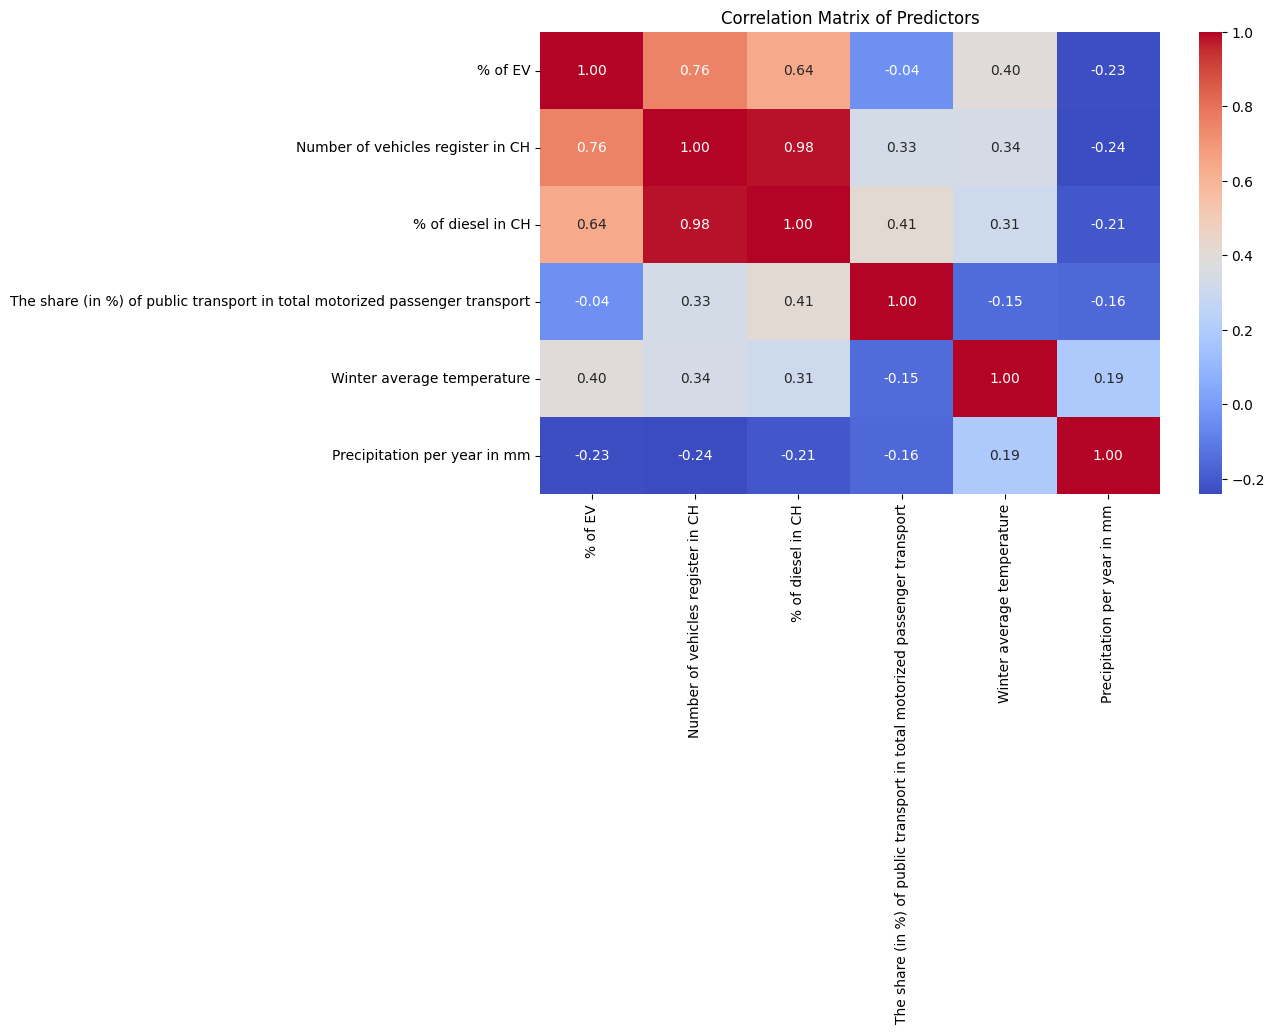

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric predictor columns you're using
columns_of_interest = [
    "% of EV","Number of vehicles register in CH", "% of diesel in CH",
    "The share (in %) of public transport in total motorized passenger transport",
    "Winter average temperature",
    "Precipitation per year in mm"
]

# Create correlation matrix
correlation_matrix = merged_data2[columns_of_interest].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Predictors")
plt.show()

# Prediction

## Prediction for CO2


### Prediction for CO2 with simple linear regression


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = merged_data2[['% of EV']]
y = merged_data2['C02 due to transport (in tonne)']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression(fit_intercept= True)
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score/accuracy
print("R\u00b2 Score of the model: ", round(model.score(X_train, y_train), 3))

R² Score of the model:  0.721


In [124]:
#Model prediction from X_test
predictions = model.predict(X_test)

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [126]:
# Compute the MAE, the MSE and the R^2
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:0.2f}")
print(f"MSE: {mse:0.2f}")
print(f"R\u00b2: {r2:0.2f} " )

MAE: 0.19
MSE: 0.05
R²: 0.72 


In [127]:
predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae:0.2f}; MAE train set: {mae_train:0.2f};")
print(f"MSE test set: {mse:0.2f}; MSE train set: {mse_train:0.2f};")
print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 train set: {r2_train:0.2f};" )

MAE test set: 0.19; MAE train set: 0.11;
MSE test set: 0.05; MSE train set: 0.01;
R² test set: 0.72; R² train set: 0.72;


### Prediction for CO2 with Multivariate linear regression


In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X = merged_data2[['% of EV','Number of vehicles register in CH','The share (in %) of public transport in total motorized passenger transport']]
y = merged_data2[['C02 due to transport (in tonne)']]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score/accuracy
print("R\u00b2 Score of the model: ", round(model.score(X_train, y_train), 3))
# 4. Print the coefficients of the linear model
print("Intercept: ", model.intercept_[0])
model_coeff = pd.DataFrame(model.coef_.flatten(),
                     index=['% of EV','Number of vehicles register in CH','The share (in %) of public transport in total motorized passenger transport'],
                     columns=['Coefficients multivariate model'])
model_coeff # Get the coefficients, w

R² Score of the model:  0.866
Intercept:  0.6266289444338013


,Coefficients multivariate model
% of EV,-0.6148410854
Number of vehicles register in CH,-0.5069036259
The share (in %) of public transport in total motorized passenger transport,0.5033072298


In [133]:
# Predict:
predictions = model.predict(X_test)

# Compute the MAE, the MSE and the R^2 on the test set
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae:0.2f}; MAE training set: {mae_train:0.2f};")
print(f"MSE test set: {mse:0.2f}; MSE training set: {mse_train:0.2f};")
print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 training set: {r2_train:0.2f};" )

MAE test set: 0.10; MAE training set: 0.07;
MSE test set: 0.02; MSE training set: 0.01;
R² test set: 0.87; R² training set: 0.87;


### Polynomial regression

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = merged_data2[['% of EV']]
y = merged_data2['C02 due to transport (in tonne)']

# Step 2: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Step 4: Train the model
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_test = poly_model.predict(X_test)
y_pred_train = poly_model.predict(X_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"MAE test: {mae_test:.2f}, train: {mae_train:.2f}")
print(f"MSE test: {mse_test:.2f}, train: {mse_train:.2f}")
print(f"R² test: {r2_test:.3f}, train: {r2_train:.3f}")

MAE test: 0.14, train: 0.09
MSE test: 0.03, train: 0.01
R² test: 0.846, train: 0.780


### Polynomial regression with multivariable

In [135]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Step 1: Define your features and target
X = merged_data2[[
    '% of EV','Number of vehicles register in CH',
]]
y = merged_data2['C02 due to transport (in tonne)']

# Step 2: Generate polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Step 4: Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Step 6: Print results
print(f"MAE test set: {mae_test:.2f}, MAE train set: {mae_train:.2f}")
print(f"MSE test set: {mse_test:.2f}, MSE train set: {mse_train:.2f}")
print(f"R² test set: {r2_test:.3f}, R² train set: {r2_train:.3f}")

MAE test set: 0.08, MAE train set: 0.07
MSE test set: 0.01, MSE train set: 0.01
R² test set: 0.945, R² train set: 0.896


### Lazypredict

In [136]:
pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00


In [137]:
X = merged_data2[['% of EV']]
y = merged_data2[['C02 due to transport (in tonne)']]

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = merged_data2[[
    '% of EV'
]]
y = merged_data2['C02 due to transport (in tonne)']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and run lazypredict
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
# Filter out LightGBM from the results
models_filtered = models[~models.index.str.contains("LightGBM", case=False)]
import matplotlib.pyplot as plt



  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 18, number of used features: 0
[LightGBM] [Info] Start training from score 0.614695
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

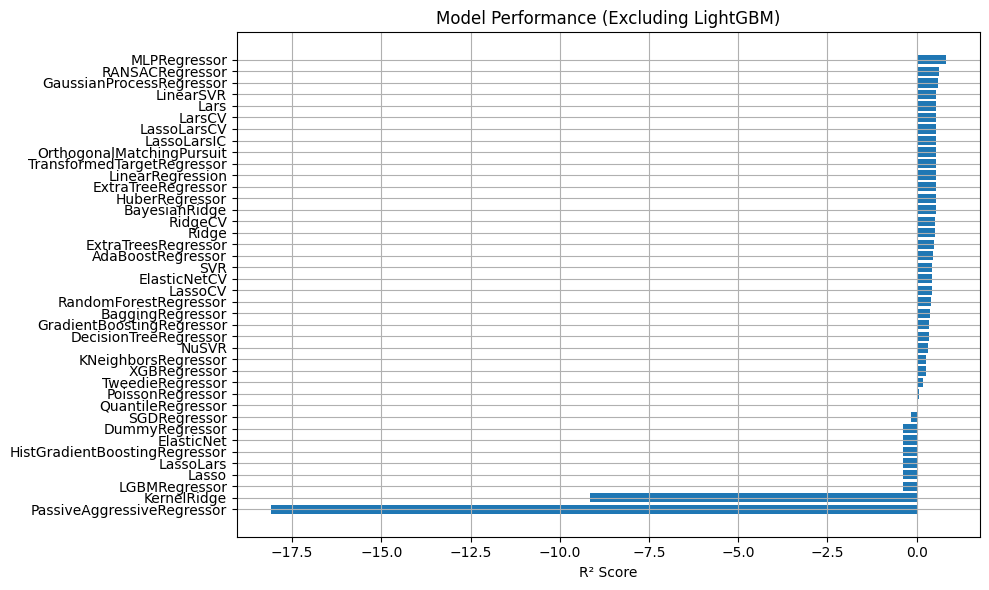

In [140]:
# Remove LightGBM from model results
models_filtered = models[~models.index.str.contains("LightGBM", case=False)]

# Plot without LightGBM
import matplotlib.pyplot as plt

models_sorted = models_filtered.sort_values(by="R-Squared", ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(models_sorted.index, models_sorted['R-Squared'])
plt.xlabel("R² Score")
plt.title("Model Performance (Excluding LightGBM)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

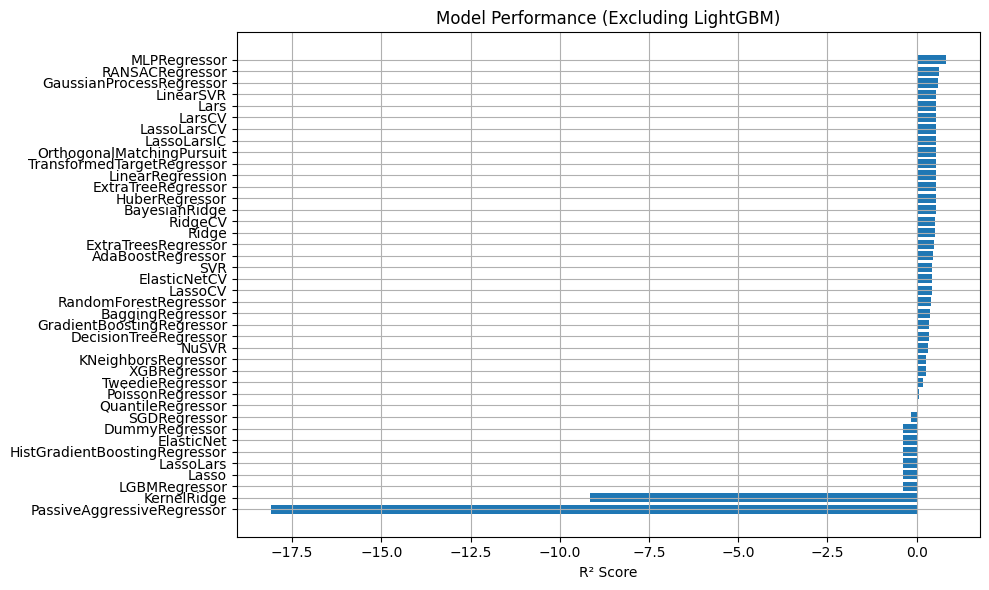

In [141]:
# Remove LightGBM from model results
models_filtered = models[~models.index.str.contains("LightGBM", case=False)]

# Plot without LightGBM
import matplotlib.pyplot as plt

models_sorted = models_filtered.sort_values(by="R-Squared", ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(models_sorted.index, models_sorted['R-Squared'])
plt.xlabel("R² Score")
plt.title("Model Performance (Excluding LightGBM)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [142]:
print(models_filtered.sort_values(by="R-Squared", ascending=False).head(20))

                            Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                      
MLPRegressor                              0.77       0.83  0.09        0.12
RANSACRegressor                           0.52       0.64  0.12        0.07
GaussianProcessRegressor                  0.46       0.59  0.13        0.07
LinearSVR                                 0.41       0.56  0.14        0.02
Lars                                      0.39       0.54  0.14        0.03
LarsCV                                    0.39       0.54  0.14        0.03
LassoLarsCV                               0.39       0.54  0.14        0.02
LassoLarsIC                               0.39       0.54  0.14        0.02
OrthogonalMatchingPursuit                 0.39       0.54  0.14        0.02
TransformedTargetRegressor                0.39       0.54  0.14        0.03
LinearRegression                          0.39       0.54  0.14        0.02
ExtraTreeReg

### Lazypredict with multivariable

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 0
[LightGBM] [Info] Start training from score 0.594758
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

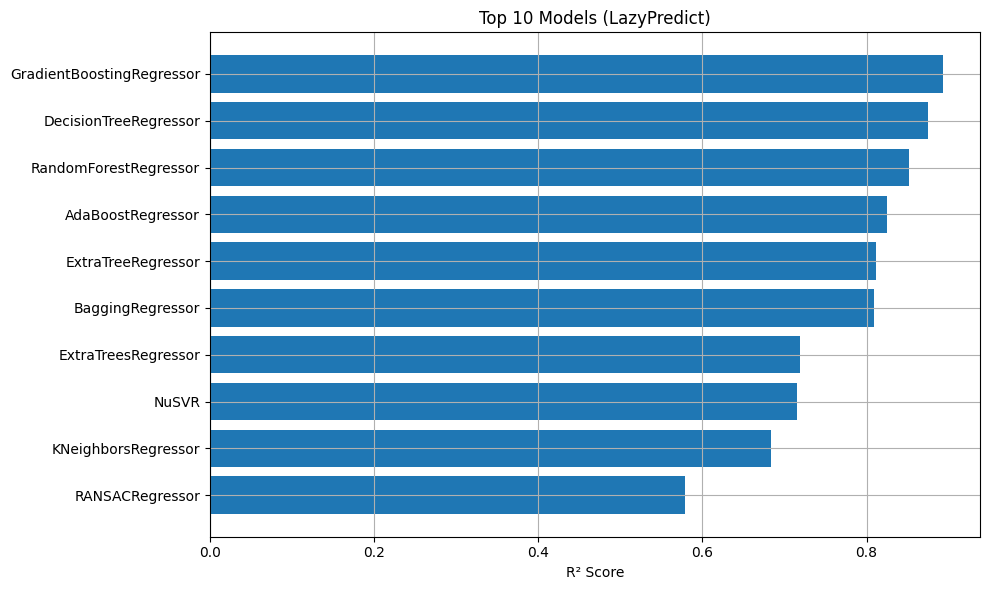

In [143]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare your data
X = merged_data2[[
    '% of EV',
    '% of diesel in CH',
    'The share (in %) of public transport in total motorized passenger transport',
    'Average temperature'
]]
y = merged_data2['C02 due to transport (in tonne)']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data properly (important!)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Run LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, _ = reg.fit(X_train, X_test, y_train, y_test)

# Drop LightGBM and NaNs safely
models = models[~models.index.astype(str).str.contains("LightGBM", case=False)]
models = models.dropna()

# Show and plot top 10 models
print(models.sort_values("R-Squared", ascending=False).head(10))

models_sorted = models.sort_values(by="R-Squared", ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(models_sorted.index[:10], models_sorted["R-Squared"][:10])
plt.xlabel("R² Score")
plt.title("Top 10 Models (LazyPredict)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


## Prediction for NO2


### Prediction for NO2 with simple linear regression


In [144]:
X = merged_data2[['% of EV']]
y = merged_data2['Emission of N02 due to transport in 1000 tonne']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression(fit_intercept= True)
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score/accuracy
print("R\u00b2 Score of the model: ", round(model.score(X_train, y_train), 3))

R² Score of the model:  0.701


In [148]:
#Model prediction from X_test
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae:0.2f}; MAE train set: {mae_train:0.2f};")
print(f"MSE test set: {mse:0.2f}; MSE train set: {mse_train:0.2f};")
print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 train set: {r2_train:0.2f};" )

MAE test set: 0.10; MAE train set: 0.10;
MSE test set: 0.02; MSE train set: 0.02;
R² test set: 0.87; R² train set: 0.70;


### Prediction for NO2 with Multivariate linear regression


In [149]:
X = merged_data2[['% of EV', 'Number of vehicles register in CH','Covid 19']]
y = merged_data2[['Emission of N02 due to transport in 1000 tonne']]

In [150]:
X = merged_data2[['% of EV','% of diesel in CH','Average temperature']]
y = merged_data2[['Emission of N02 due to transport in 1000 tonne']]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [152]:
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score/accuracy
print("R\u00b2 Score of the model: ", round(model.score(X_train, y_train), 3))
# 4. Print the coefficients of the linear model
print("Intercept: ", model.intercept_[0])
model_coeff = pd.DataFrame(model.coef_.flatten(),
                     index=['% of EV','% of diesel in CH','Average temperature'],
                     columns=['Coefficients multivariate model'])
model_coeff # Get the coefficients, w

R² Score of the model:  0.934
Intercept:  0.8271319843841131


,Coefficients multivariate model
% of EV,-0.49
% of diesel in CH,-0.38
Average temperature,0.05


In [153]:
# Predict:
predictions = model.predict(X_test)

# Compute the MAE, the MSE and the R^2 on the test set
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae:0.2f}; MAE training set: {mae_train:0.2f};")
print(f"MSE test set: {mse:0.2f}; MSE training set: {mse_train:0.2f};")
print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 training set: {r2_train:0.2f};" )

MAE test set: 0.11; MAE training set: 0.05;
MSE test set: 0.02; MSE training set: 0.00;
R² test set: 0.74; R² training set: 0.93;


### Polynomial regression

In [154]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = merged_data2[['% of EV']]
y = merged_data2['Emission of N02 due to transport in 1000 tonne']

# Step 2: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Step 4: Train the model
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_test = poly_model.predict(X_test)
y_pred_train = poly_model.predict(X_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"MAE test: {mae_test:.2f}, train: {mae_train:.2f}")
print(f"MSE test: {mse_test:.2f}, train: {mse_train:.2f}")
print(f"R² test: {r2_test:.3f}, train: {r2_train:.3f}")

MAE test: 0.08, train: 0.07
MSE test: 0.01, train: 0.01
R² test: 0.863, train: 0.833


### Polynomial regression with multivariable

In [155]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = merged_data2[['% of EV','% of diesel in CH','Average temperature']]
y = merged_data2['Emission of N02 due to transport in 1000 tonne']

# Step 2: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Step 4: Train the model
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_test = poly_model.predict(X_test)
y_pred_train = poly_model.predict(X_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"MAE test: {mae_test:.2f}, train: {mae_train:.2f}")
print(f"MSE test: {mse_test:.2f}, train: {mse_train:.2f}")
print(f"R² test: {r2_test:.3f}, train: {r2_train:.3f}")

MAE test: 0.03, train: 0.02
MSE test: 0.00, train: 0.00
R² test: 0.977, train: 0.982


### Lazypredict

In [156]:
X = merged_data2[['% of EV']]
y = merged_data2[['Emission of N02 due to transport in 1000 tonne']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [157]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = merged_data2[[
    '% of EV'
]]
y = merged_data2['Emission of N02 due to transport in 1000 tonne']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and run lazypredict
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
# Filter out LightGBM from the results
models_filtered = models[~models.index.str.contains("LightGBM", case=False)]
import matplotlib.pyplot as plt

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 18, number of used features: 0
[LightGBM] [Info] Start training from score 0.515056
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

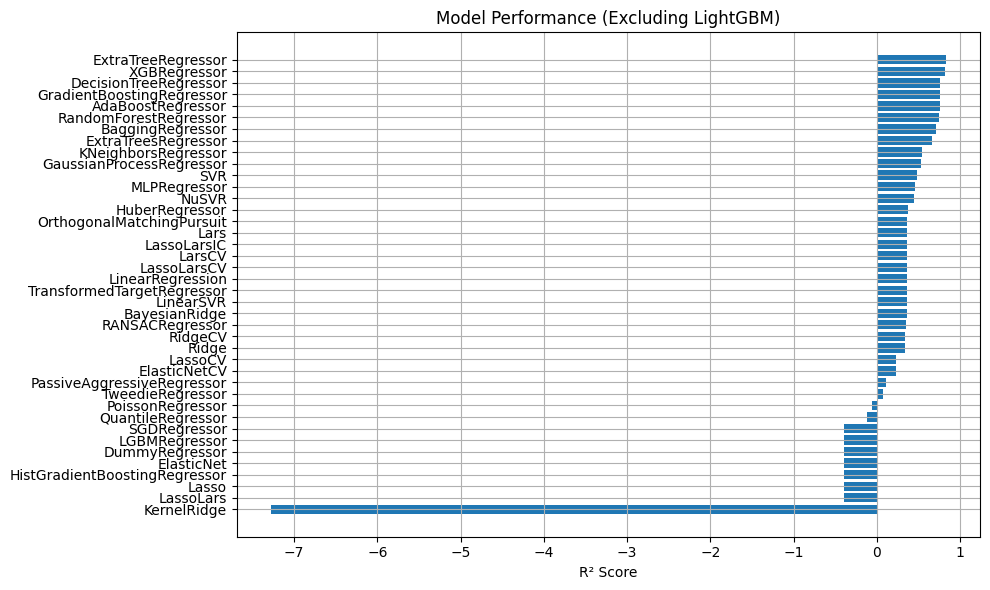

In [158]:
# Remove LightGBM from model results
models_filtered = models[~models.index.str.contains("LightGBM", case=False)]

# Plot without LightGBM
import matplotlib.pyplot as plt

models_sorted = models_filtered.sort_values(by="R-Squared", ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(models_sorted.index, models_sorted['R-Squared'])
plt.xlabel("R² Score")
plt.title("Model Performance (Excluding LightGBM)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [159]:
print(models_filtered.sort_values(by="R-Squared", ascending=False).head(10))

                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
ExtraTreeRegressor                       0.78       0.83  0.08        0.06
XGBRegressor                             0.76       0.82  0.09        0.06
DecisionTreeRegressor                    0.68       0.76  0.10        0.02
GradientBoostingRegressor                0.68       0.76  0.10        0.16
AdaBoostRegressor                        0.67       0.75  0.10        0.50
RandomForestRegressor                    0.66       0.75  0.10        0.31
BaggingRegressor                         0.61       0.71  0.11        0.11
ExtraTreesRegressor                      0.55       0.66  0.12        0.26
KNeighborsRegressor                      0.39       0.54  0.14        0.02
GaussianProcessRegressor                 0.38       0.53  0.14        0.09


### Lazypredict with multivariable

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 0
[LightGBM] [Info] Start training from score 0.487877
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

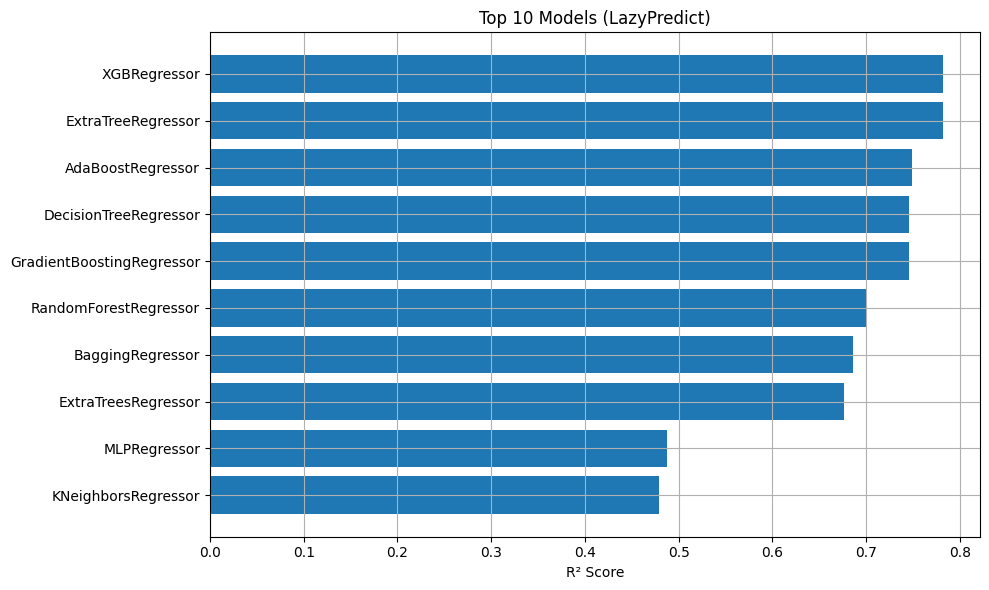

In [160]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare your data
X = merged_data2[[
    '% of EV'
]]
y = merged_data2['Emission of N02 due to transport in 1000 tonne']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data properly (important!)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Run LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, _ = reg.fit(X_train, X_test, y_train, y_test)

# Drop LightGBM and NaNs safely
models = models[~models.index.astype(str).str.contains("LightGBM", case=False)]
models = models.dropna()

# Show and plot top 10 models
print(models.sort_values("R-Squared", ascending=False).head(10))

models_sorted = models.sort_values(by="R-Squared", ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(models_sorted.index[:10], models_sorted["R-Squared"][:10])
plt.xlabel("R² Score")
plt.title("Top 10 Models (LazyPredict)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

## Prediction for PM 10

### Prediction for PM 10 with simple linear regression

In [161]:
X = merged_data2[['% of EV']]
y = merged_data2['PM 10 due to transport in tonne']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [163]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression(fit_intercept= True)
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score/accuracy
print("R\u00b2 Score of the model: ", round(model.score(X_train, y_train), 3))

R² Score of the model:  0.567


In [164]:
#Model prediction from X_test
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae:0.2f}; MAE train set: {mae_train:0.2f};")
print(f"MSE test set: {mse:0.2f}; MSE train set: {mse_train:0.2f};")
print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 train set: {r2_train:0.2f};" )

MAE test set: 0.11; MAE train set: 0.14;
MSE test set: 0.02; MSE train set: 0.03;
R² test set: 0.74; R² train set: 0.57;


### Prediction for PM 10 with Multivariate linear regression

In [165]:
y = merged_data2[['PM 10 due to transport in tonne']]
X = merged_data2[['% of EV', 'Number of vehicles register in CH','Covid 19','Precipitation per year in mm']]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [167]:
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score/accuracy
print("R\u00b2 Score of the model: ", round(model.score(X_train, y_train), 3))
# 4. Print the coefficients of the linear model
print("Intercept: ", model.intercept_[0])
model_coeff = pd.DataFrame(model.coef_.flatten(),
                     index=['% of EV','Number of vehicles register in CH','Covid 19','Precipitation per year in mm'],
                     columns=['Coefficients multivariate model'])
model_coeff # Get the coefficients, w

R² Score of the model:  0.955
Intercept:  0.9526987905004343


,Coefficients multivariate model
% of EV,-0.13
Number of vehicles register in CH,-0.70
Covid 19,0.00
Precipitation per year in mm,0.02


In [168]:
# Predict:
predictions = model.predict(X_test)

# Compute the MAE, the MSE and the R^2 on the test set
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae:0.2f}; MAE training set: {mae_train:0.2f};")
print(f"MSE test set: {mse:0.2f}; MSE training set: {mse_train:0.2f};")
print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 training set: {r2_train:0.2f};" )

MAE test set: 0.08; MAE training set: 0.04;
MSE test set: 0.02; MSE training set: 0.00;
R² test set: 0.78; R² training set: 0.95;


### Polynomial regression

In [169]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = merged_data2[['% of EV']]
y = merged_data2['PM 10 due to transport in tonne']

# Step 2: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Step 4: Train the model
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_test = poly_model.predict(X_test)
y_pred_train = poly_model.predict(X_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"MAE test: {mae_test:.2f}, train: {mae_train:.2f}")
print(f"MSE test: {mse_test:.2f}, train: {mse_train:.2f}")
print(f"R² test: {r2_test:.3f}, train: {r2_train:.3f}")

MAE test: 0.09, train: 0.06
MSE test: 0.01, train: 0.01
R² test: 0.863, train: 0.880


### Polynomial regression with multivariable

In [170]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = merged_data2[['% of EV','% of diesel in CH' ]]
y = merged_data2['PM 10 due to transport in tonne']

# Step 2: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Step 4: Train the model
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_test = poly_model.predict(X_test)
y_pred_train = poly_model.predict(X_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"MAE test: {mae_test:.2f}, train: {mae_train:.2f}")
print(f"MSE test: {mse_test:.2f}, train: {mse_train:.2f}")
print(f"R² test: {r2_test:.3f}, train: {r2_train:.3f}")

MAE test: 0.05, train: 0.04
MSE test: 0.01, train: 0.00
R² test: 0.917, train: 0.960


### Lazypredict

In [171]:
X = merged_data2[['% of EV']]
y = merged_data2[['PM 10 due to transport in tonne']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = merged_data2[[
    '% of EV'
]]
y = merged_data2['PM 10 due to transport in tonne']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and run lazypredict
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
# Filter out LightGBM from the results
models_filtered = models[~models.index.str.contains("LightGBM", case=False)]
import matplotlib.pyplot as plt

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 18, number of used features: 0
[LightGBM] [Info] Start training from score 0.541104
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

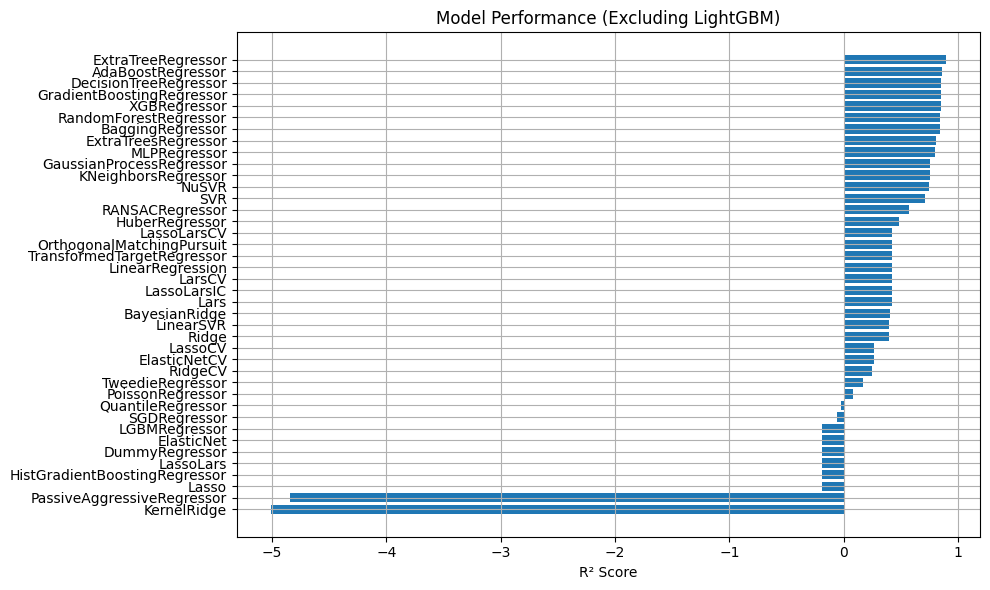

In [173]:
# Remove LightGBM from model results
models_filtered = models[~models.index.str.contains("LightGBM", case=False)]

# Plot without LightGBM
import matplotlib.pyplot as plt

models_sorted = models_filtered.sort_values(by="R-Squared", ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(models_sorted.index, models_sorted['R-Squared'])
plt.xlabel("R² Score")
plt.title("Model Performance (Excluding LightGBM)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [174]:
print(models_filtered.sort_values(by="R-Squared", ascending=False).head(10))

                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
ExtraTreeRegressor                       0.86       0.90  0.08        0.02
AdaBoostRegressor                        0.81       0.86  0.09        0.26
DecisionTreeRegressor                    0.81       0.85  0.09        0.03
GradientBoostingRegressor                0.81       0.85  0.09        0.14
XGBRegressor                             0.80       0.85  0.09        0.52
RandomForestRegressor                    0.79       0.84  0.10        0.75
BaggingRegressor                         0.79       0.84  0.10        0.13
ExtraTreesRegressor                      0.75       0.81  0.11        0.20
MLPRegressor                             0.73       0.80  0.11        0.10
GaussianProcessRegressor                 0.68       0.76  0.12        0.05


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 0
[LightGBM] [Info] Start training from score 0.487877
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

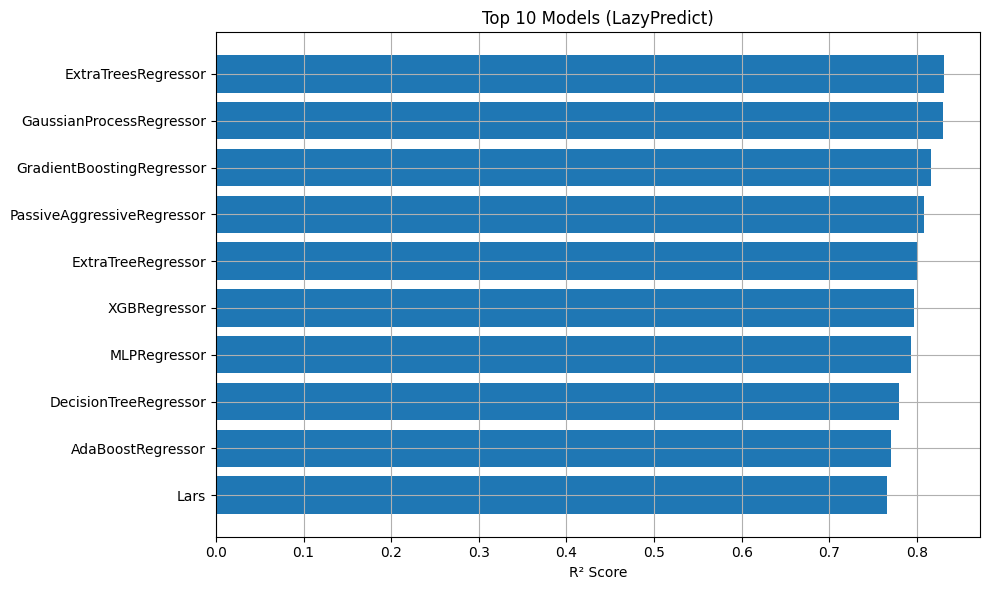

In [175]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare your data
X = merged_data2[[
    '% of EV','% of diesel in CH','Average temperature'
]]
y = merged_data2['Emission of N02 due to transport in 1000 tonne']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data properly (important!)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Run LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, _ = reg.fit(X_train, X_test, y_train, y_test)

# Drop LightGBM and NaNs safely
models = models[~models.index.astype(str).str.contains("LightGBM", case=False)]
models = models.dropna()

# Show and plot top 10 models
print(models.sort_values("R-Squared", ascending=False).head(10))

models_sorted = models.sort_values(by="R-Squared", ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(models_sorted.index[:10], models_sorted["R-Squared"][:10])
plt.xlabel("R² Score")
plt.title("Top 10 Models (LazyPredict)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()